# Установим необходимые библиотеки

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Для управления предупреждениями

from sklearn import linear_model
# print(sklearn.__version__)
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,  recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')

In [30]:
db_path='C:/Users/nickk/OneDrive/Desktop/TPU/ProgrammingPython/diabetes_coursework/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
data= pd.read_csv(db_path)
# Установим максимальное количество отображаемых столбцов
pd.set_option('display.max_columns', None)
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


# инфо о датасете.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

# Выведем информацию о количестве строк и столбцов датасета

In [32]:
# df.shape
print(f"Num rows: {len(data)}")
print(f"Num columns: {len(data.columns)}")

Num rows: 70692
Num columns: 22


In [33]:
data.shape

(70692, 22)

# Визуализируем данные по целевой переменной (0 - No diabetes, 1 - diabetes)

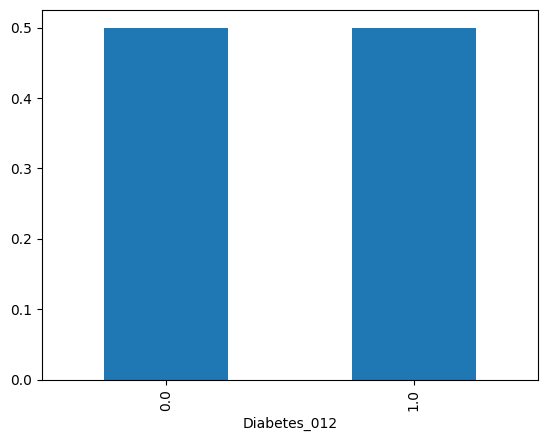

In [34]:
data['Diabetes_012'].value_counts(normalize=True).plot(kind='bar');

# Выведем названия столбцов датасета

In [35]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

# Используем метод data.describe() из pandas для получения сводной статистики о данных датасета. Этот метод предоставляет полезную информацию о распределении данных в каждом столбце, включая такие статистические показатели

In [36]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,0.042721,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,0.202228,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# Применим метод isnull().sum(), библиотека pandas, для проверки наличия пропущенных (нулевых) значений в DataFrame data. Этот метод возвращает новый DataFrame того же размера, что и data, где каждое значение заменяется на True, если оно является пропущенным (null или NaN), и на False, если оно не является пропущенным.На выходе получаем логическую матрицу, где True указывает на наличие пропущенного значения.

In [37]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [38]:
# Проверка на наличие хотя бы одного пропущенного значения
has_missing_values = data.isnull().sum().any()
print(has_missing_values)  # Вывод: True

False


# как видим выше, пропущенных значений нет

# Проверим на дубликаты

In [39]:
data.duplicated().sum()

1635

# Метод loc для доступа к строкам и столбцам DF по меткам. В данном случае для выбора строк, которые соответствуют условию, указанному в квадратных скобках, то есть для выбора дубликатов. Двоеточие : после запятой указывает, что мы хотим выбрать все столбцы для этих строк.

In [40]:
data.loc[data.duplicated(),:]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
602,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
689,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
891,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
1092,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
1326,0.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69865,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
69939,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
70305,1.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,4.0,7.0
70591,1.0,1.0,1.0,1.0,30.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0


# Удалим дубликаты и выведем размер DF после их  удаления.

In [41]:
data.drop_duplicates(inplace=True)
data.shape

(69057, 22)

# Построим тепловую карту для визуализации корреляционной матрицы с помощью библиотеки seaborn, которая является высокоуровневой библиотекой для визуализации данных на основе matplotlib.data.corr(): Этот метод вычисляет корреляцию между числовыми столбцами в DataFrame data. Он возвращает корреляционную матрицу, где каждая ячейка содержит коэффициент корреляции Пирсона между двумя столбцами. Значения корреляции варьируются от -1 до 1:1 означает полную положительную корреляцию (когда один столбец увеличивается, другой также увеличивается).-1 означает полную отрицательную корреляцию (когда один столбец увеличивается, другой уменьшается).0 означает отсутствие корреляции.sns.heatmap(...): Этот метод из библиотеки seaborn создает тепловую карту (heatmap) на основе переданной матрицы. Тепловая карта визуализирует данные в виде цветных ячеек, где цвет каждой ячейки соответствует значению в матрице. annot=True: Этот параметр указывает, что значения корреляции должны быть отображены в ячейках тепловой карты. Если вы установите annot=False, значения не будут отображаться.cmap="YlGnBu": Этот параметр задает цветовую палитру для тепловой карты. В данном случае используется палитра "YlGnBu", которая представляет собой градиент от желтого (низкие значения) к синему (высокие значения).

<Axes: >

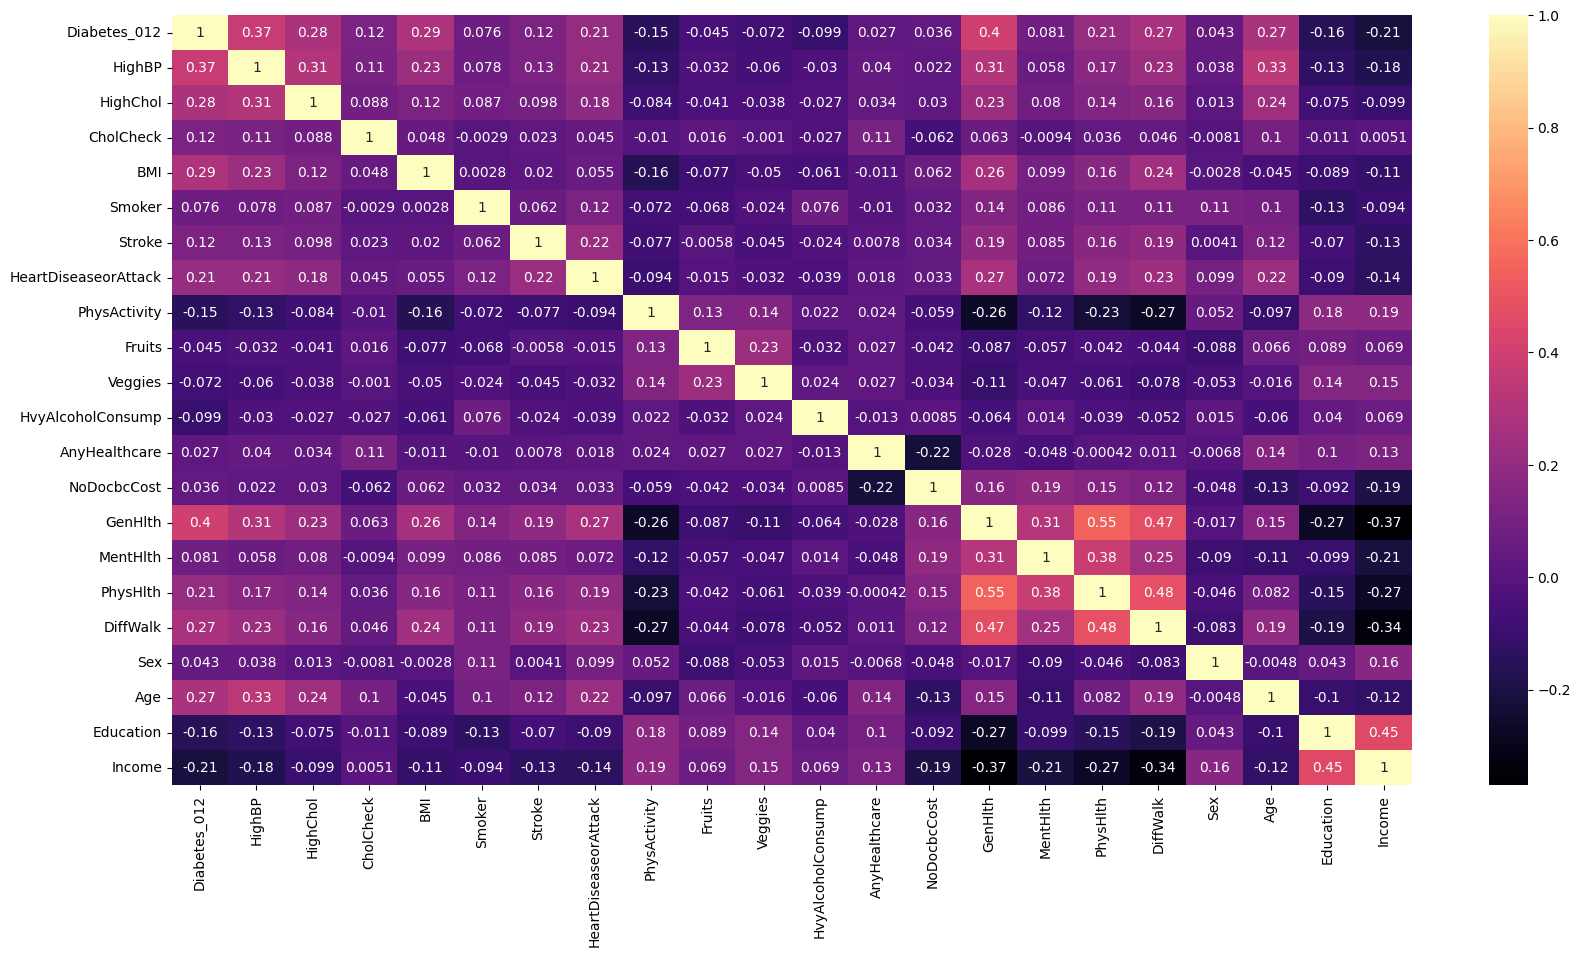

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="magma")

In [43]:
df_vis=data.copy()

# Преобразуем значения в копии DF для лучшего понимания при визуализации

In [44]:
#transform data
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 0] = 'No Diabetes'
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 1] = 'Diabetes'

df_vis.HighBP[df_vis['HighBP'] == 0] = 'No High BP'
df_vis.HighBP[df_vis['HighBP'] == 1] = 'High BP'

df_vis.HighChol[df_vis['HighChol'] == 0] = 'No High Cholesterol'
df_vis.HighChol[df_vis['HighChol'] == 1] = 'High Cholesterol'

df_vis.CholCheck[df_vis['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df_vis.CholCheck[df_vis['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df_vis.Smoker[df_vis['Smoker'] == 0] = 'No'
df_vis.Smoker[df_vis['Smoker'] == 1] = 'Yes'

df_vis.Stroke[df_vis['Stroke'] == 0] = 'No'
df_vis.Stroke[df_vis['Stroke'] == 1] = 'Yes'

df_vis.HeartDiseaseorAttack[df_vis['HeartDiseaseorAttack'] == 0] = 'No'
df_vis.HeartDiseaseorAttack[df_vis['HeartDiseaseorAttack'] == 1] = 'Yes'

df_vis.PhysActivity[df_vis['PhysActivity'] == 0] = 'No'
df_vis.PhysActivity[df_vis['PhysActivity'] == 1] = 'Yes'

df_vis.Fruits[df_vis['Fruits'] == 0] = 'No'
df_vis.Fruits[df_vis['Fruits'] == 1] = 'Yes'

df_vis.Veggies[df_vis['Veggies'] == 0] = 'No'
df_vis.Veggies[df_vis['Veggies'] == 1] = 'Yes'

df_vis.HvyAlcoholConsump[df_vis['HvyAlcoholConsump'] == 0] = 'No'
df_vis.HvyAlcoholConsump[df_vis['HvyAlcoholConsump'] == 1] = 'Yes'

df_vis.AnyHealthcare[df_vis['AnyHealthcare'] == 0] = 'No'
df_vis.AnyHealthcare[df_vis['AnyHealthcare'] == 1] = 'Yes'

df_vis.NoDocbcCost[df_vis['NoDocbcCost'] == 0] = 'No'
df_vis.NoDocbcCost[df_vis['NoDocbcCost'] == 1] = 'Yes'
df_vis.GenHlth[df_vis['GenHlth'] == 1] = 'Excellent'
df_vis.GenHlth[df_vis['GenHlth'] == 2] = 'Very Good'
df_vis.GenHlth[df_vis['GenHlth'] == 3] = 'Good'
df_vis.GenHlth[df_vis['GenHlth'] == 4] = 'Fair'
df_vis.GenHlth[df_vis['GenHlth'] == 5] = 'Poor'

df_vis.DiffWalk[df_vis['DiffWalk'] == 0] = 'No'
df_vis.DiffWalk[df_vis['DiffWalk'] == 1] = 'Yes'

df_vis.Sex[df_vis['Sex'] == 0] = 'Female'
df_vis.Sex[df_vis['Sex'] == 1] = 'Male'

df_vis.Education[df_vis['Education'] == 1] = 'Never Attended School'
df_vis.Education[df_vis['Education'] == 2] = 'Elementary'
df_vis.Education[df_vis['Education'] == 3] = 'Some high school'
df_vis.Education[df_vis['Education'] == 4] = 'High school graduate'
df_vis.Education[df_vis['Education'] == 5] = 'Some college or technical school'
df_vis.Education[df_vis['Education'] == 6] = 'College graduate'

df_vis.Income[df_vis['Income'] == 1] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 2] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 3] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 4] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 5] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 6] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 7] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 8] = '$75,000 or More'

# Проведем визуализацию данных

# Проверим сколько уникальных значений содержит каждый столбец

In [45]:
unique_values = {}
for col in df_vis.columns:
    unique_values[col] = df_vis[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['количество уник.значений']).transpose()

,количество уник.значений
Diabetes_012,2
HighBP,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


# Создадим список с 1го элемента(без Diabetes_012)	

In [46]:
cols = list(df_vis.columns)
cols_df=cols[1:]

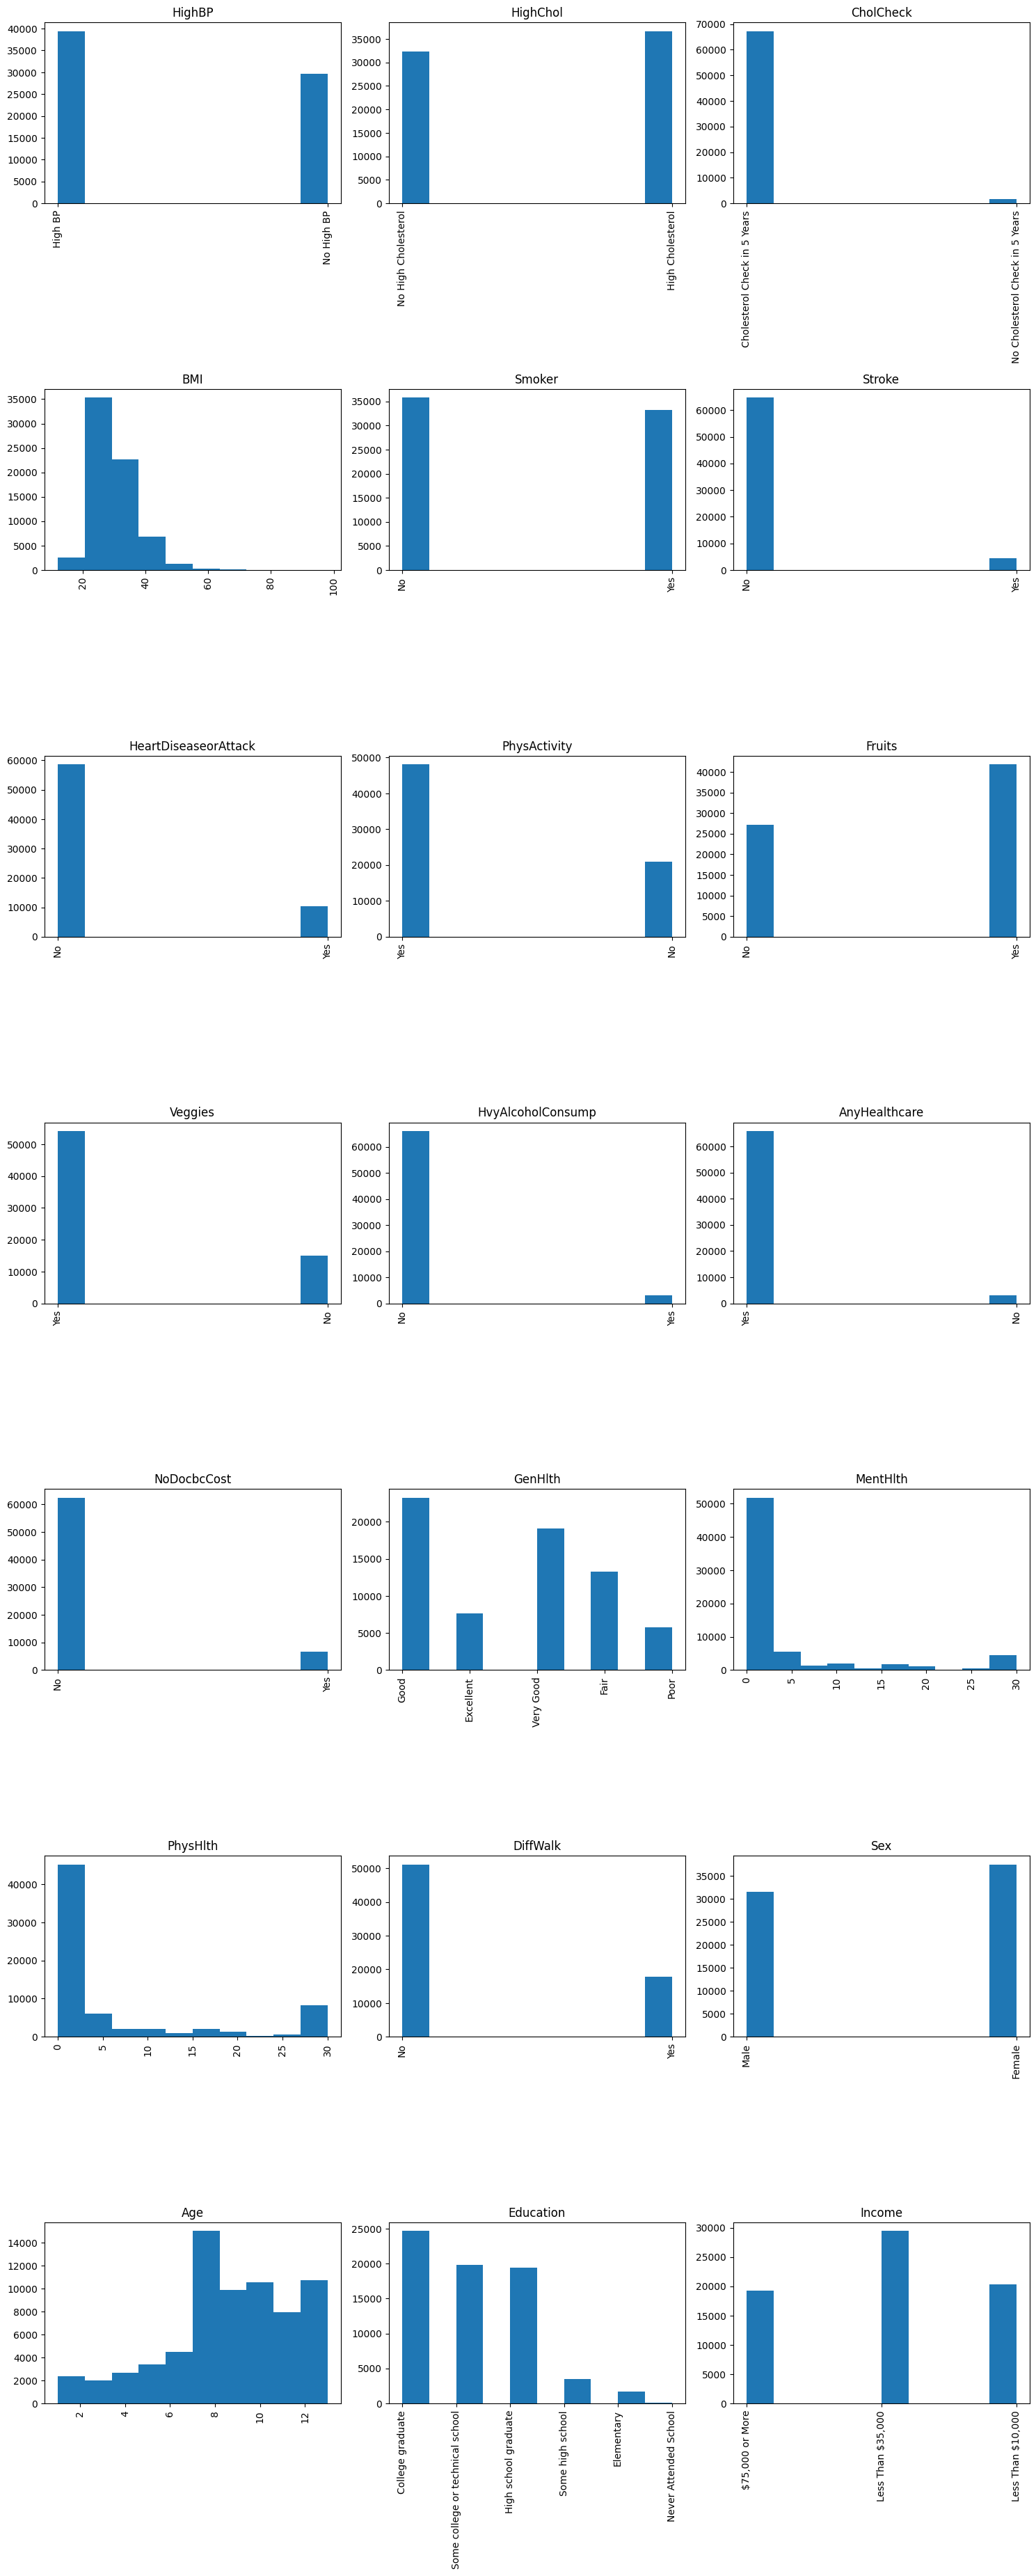

In [47]:
plt.figure(figsize=(15,40))
for i in range(len(cols_df)):
    plt.subplot(8,3,i+1)
    plt.title(cols_df[i])
    plt.xticks(rotation=90)
    plt.hist(df_vis[cols_df[i]])
    
plt.tight_layout()

# Соотношение сахарного диабета в датасете с их типами

In [48]:
df_vis['Diabetes_012'].value_counts()

Diabetes_012
Diabetes       35097
No Diabetes    33960
Name: count, dtype: int64

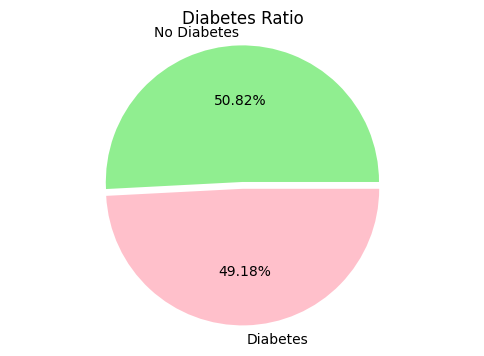

In [49]:
# pie plot of diabetes ratio 
plt.figure(figsize=(6,4))
labels = ['No Diabetes', 'Diabetes']  # Метки для двух категорий
sizes = [df_vis['Diabetes_012'].value_counts()[0], 
         df_vis['Diabetes_012'].value_counts()[1]]  # Значения для двух категорий
colors = ['lightgreen', 'pink']  # Цвета для каждой категории
explode = (0.05, 0)  # Взрыв первой части (для выделения)

# Построение круговой диаграммы
plt.pie(sizes, explode=explode, labels=labels, autopct='%.2f%%', colors=colors)
plt.title('Diabetes Ratio')  # Заголовок диаграммы
plt.axis('equal')  # Чтобы круговая диаграмма была кругом
plt.show()  # Отобразить диаграмму

# Корреляция с Diabetes_012 через гистограмму

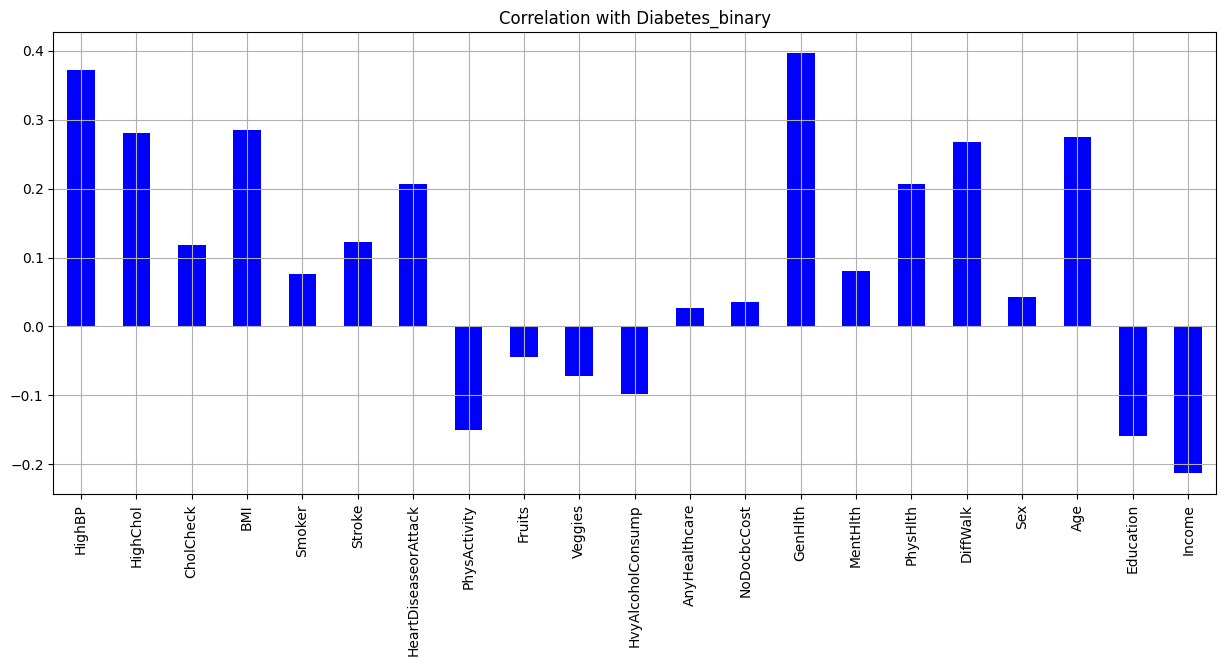

In [50]:
data.drop('Diabetes_012', axis=1).corrwith(data.Diabetes_012).plot(kind='bar', grid=True, figsize=(15, 6)
, title="Correlation with Diabetes_binary",color="blue");

# Выводы: Связь Diabetes_binary с другими столбцами в результате гистограммы:
1: Фрукты, AnyHealthcare, NoDocbccost и пол наименее коррелируют с Diabetes_binary.
2. Высокий уровень АД, холестерина , ИМТ , курение , инсульт, сердечные заболевания или приступы, Физическая активность, Овощи, употребление алкоголя.

# Распределение сахарного диабета среди мужчин и женщин //  Вывод: пол не имеет особого влияния

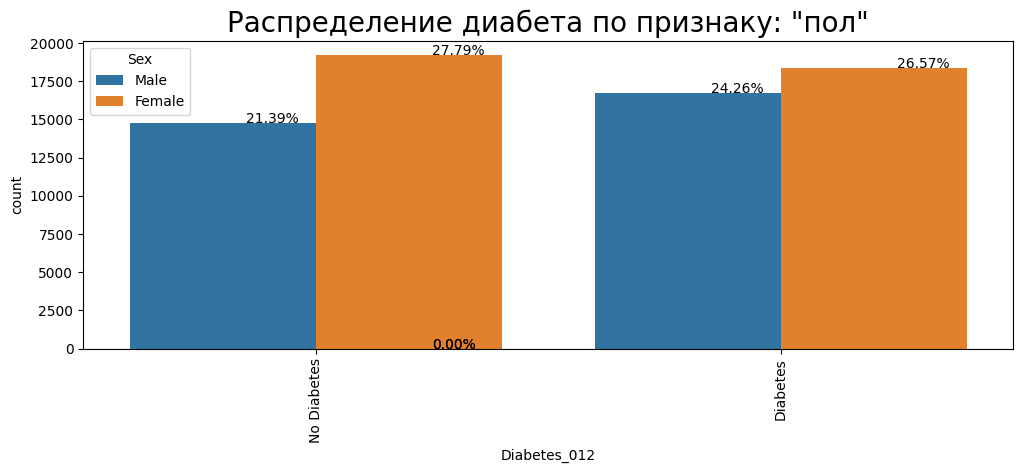

In [51]:
plt.figure(figsize=(12,4))
x= sns.countplot(x='Diabetes_012',data=df_vis,hue='Sex')
plt.xticks(rotation=90)
plt.title('Распределение диабета по признаку: "пол"',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

# Курение

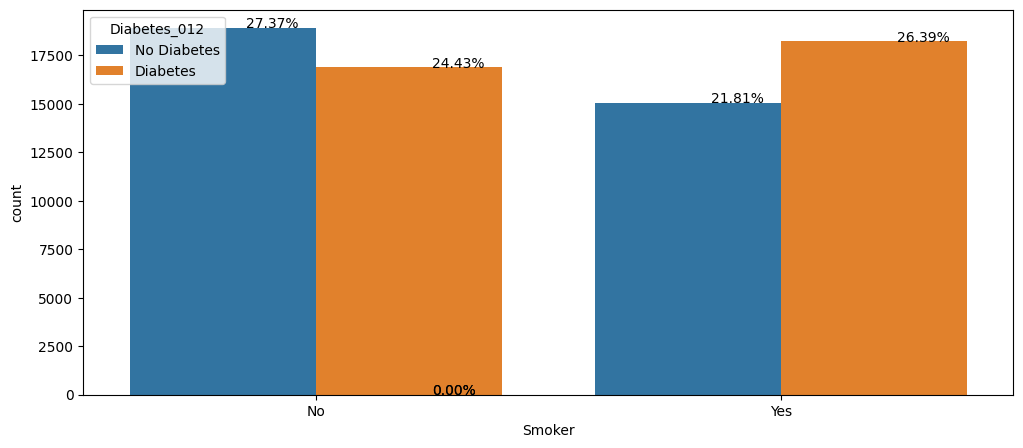

In [52]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='Smoker', hue='Diabetes_012' , data = df_vis);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

# Частое употребление алкоголя

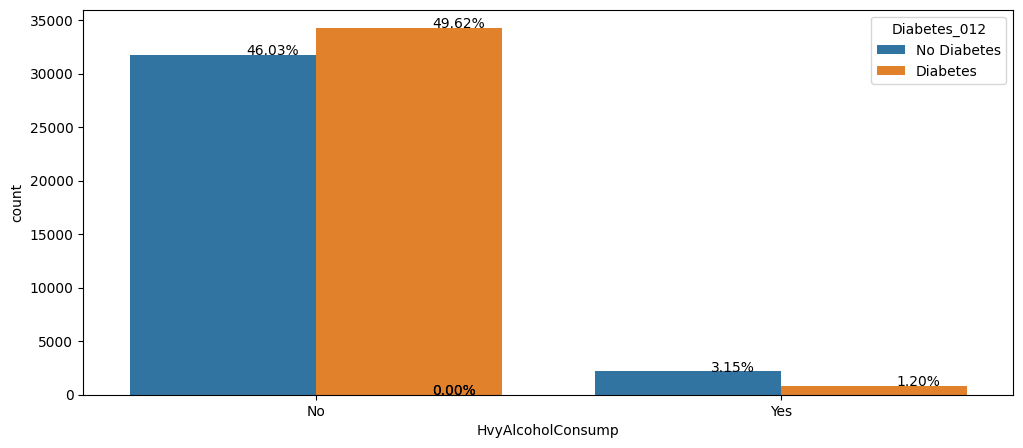

In [53]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='HvyAlcoholConsump', hue='Diabetes_012' , data = df_vis);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

# По-отдельности курение и алкоголь не оказывают сильного влияния на диабет. Проверим их совместную значимость

Text(0.5, 1.0, 'Взаимосвязь по признакам: Курение, Алкоголь и Диабет')

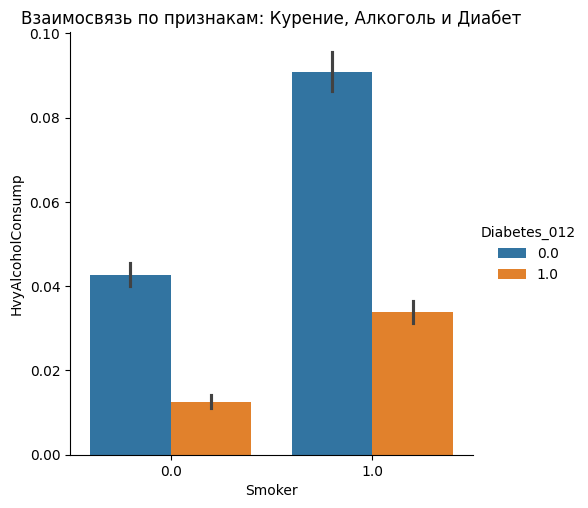

In [54]:
# (1 in Smoker, HvyAlcoholConsump is Yes), and (0 is No Diabetes, 1 is Pre Diabetes, 2 is Diabetes)

sns.catplot(x="Smoker" , y ="HvyAlcoholConsump" , data = data , hue="Diabetes_012"  , kind="bar"  );  
plt.title("Взаимосвязь по признакам: Курение, Алкоголь и Диабет")

# Результат: Согласно этим данным, одновременно курение и употребление большого количества алкоголя повышают риск диабета.

<Axes: xlabel='HeartDiseaseorAttack', ylabel='count'>

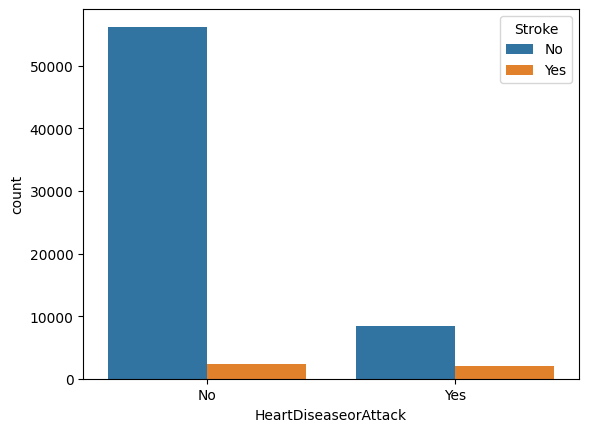

In [55]:
sns.countplot(data=df_vis,x='HeartDiseaseorAttack',hue='Stroke')

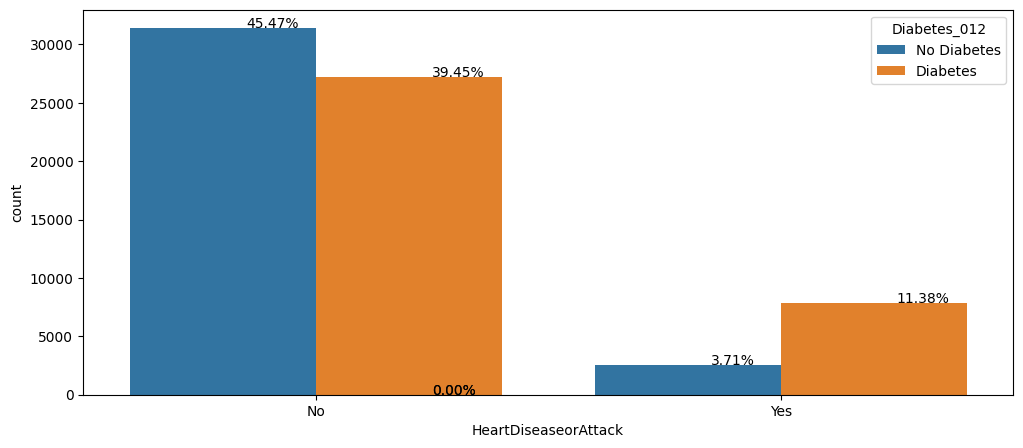

In [56]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='HeartDiseaseorAttack', hue='Diabetes_012' , data = df_vis);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()


# Вероятность развития диабета возрастает по мере того, как у человека возникают сердечные заболевания или приступы

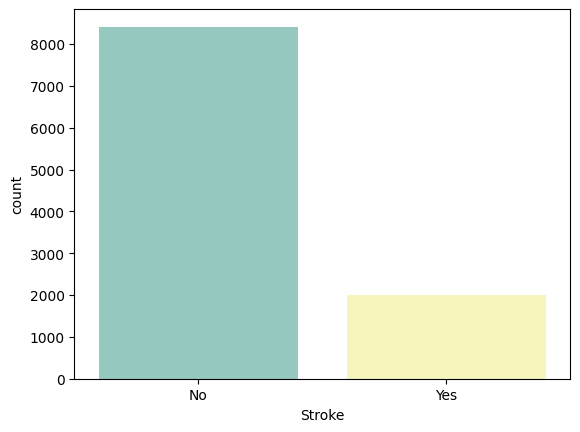

In [57]:
# plt.figure(figsize=(10,6))
sns.countplot(data=df_vis[df_vis['HeartDiseaseorAttack']=="Yes"],x='Stroke',palette='Set3');

# Инфаркт повышает риск Инсульта. Проверим их совместное влияние на Диабет

Text(0.5, 1.0, 'Совместное влияние Инсульта и Инфаркта на Диабет')

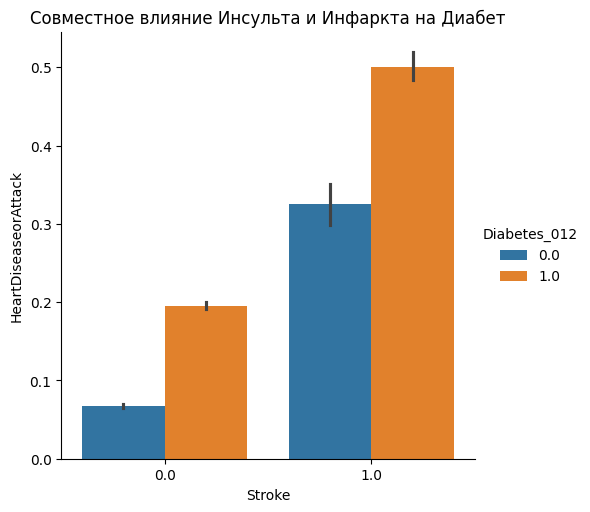

In [58]:
# (1 in Stroke is Yes), (1 in HeartDiseaseorAttack is Yes), and (0 is No Diabetes, 1 is Pre Diabetes, 2 is Diabetes)  

sns.catplot(x="Stroke" , y ="HeartDiseaseorAttack" , data = data , hue="Diabetes_012"  , kind="bar"  );
plt.title("Совместное влияние Инсульта и Инфаркта на Диабет")

# Вывод: инсульт и сердечные заболевания вместе повышают риск развития диабета

# Влияние поывшенного давления

<Axes: xlabel='Diabetes_012', ylabel='count'>

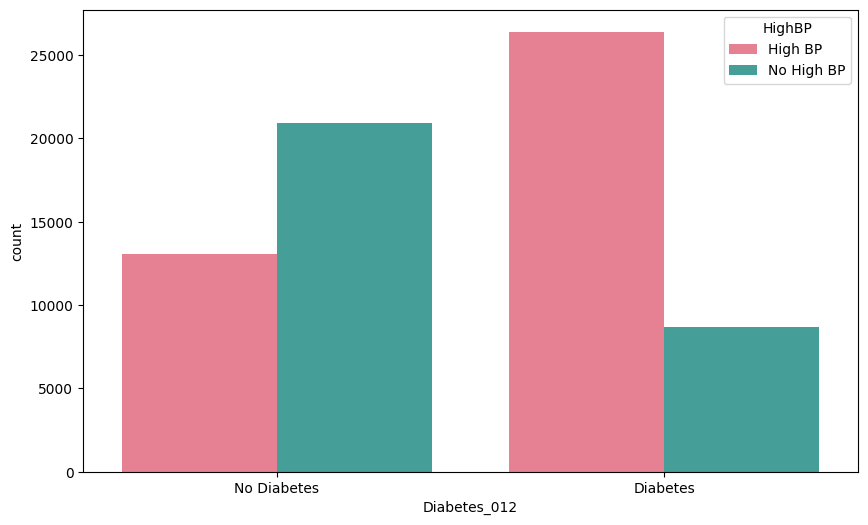

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_vis,x='Diabetes_012',hue='HighBP',palette='husl')

# sns.displot(data=df_vis,x='Diabetes_012',col='HighBP',color='#5aef1')

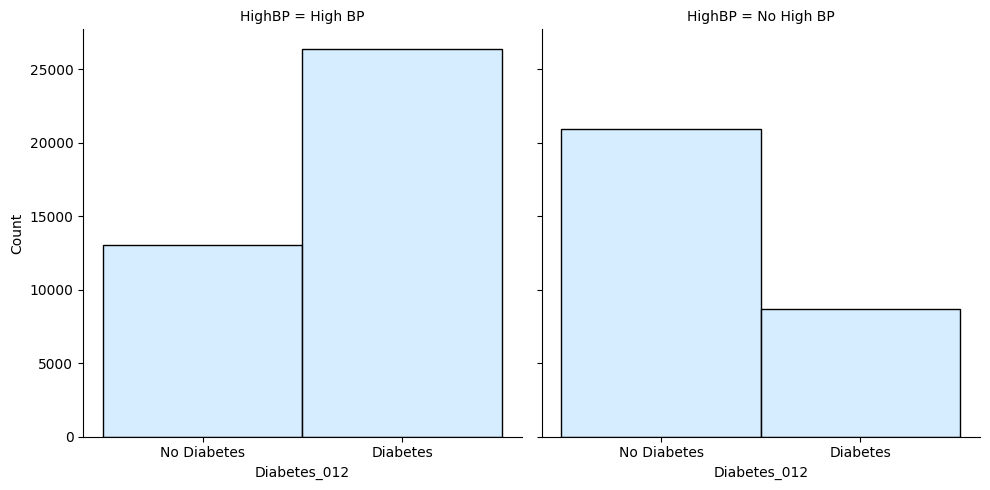

In [60]:
sns.displot(data=df_vis,x='Diabetes_012',col='HighBP',color='#c7e8ff')

# Высокий уровень холестерина

<Axes: xlabel='Diabetes_012', ylabel='count'>

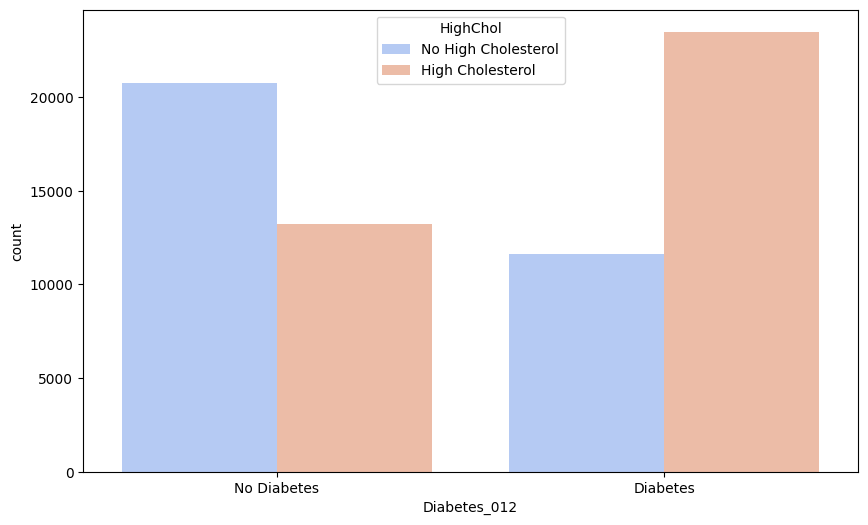

In [61]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_vis,x='Diabetes_012',hue='HighChol',palette='coolwarm')

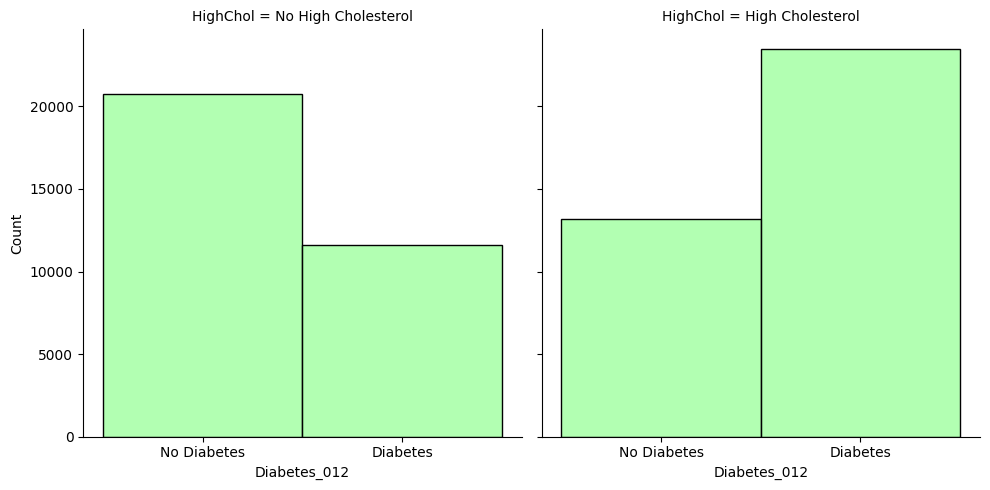

In [62]:
sns.displot(data=df_vis,x='Diabetes_012',col='HighChol',color='#98ff98')

# Выводы: диабетики, как правило, имеют высокое кровяное давление и повышенный уровень холестерина. Проверим их совместное влияние на диабет.

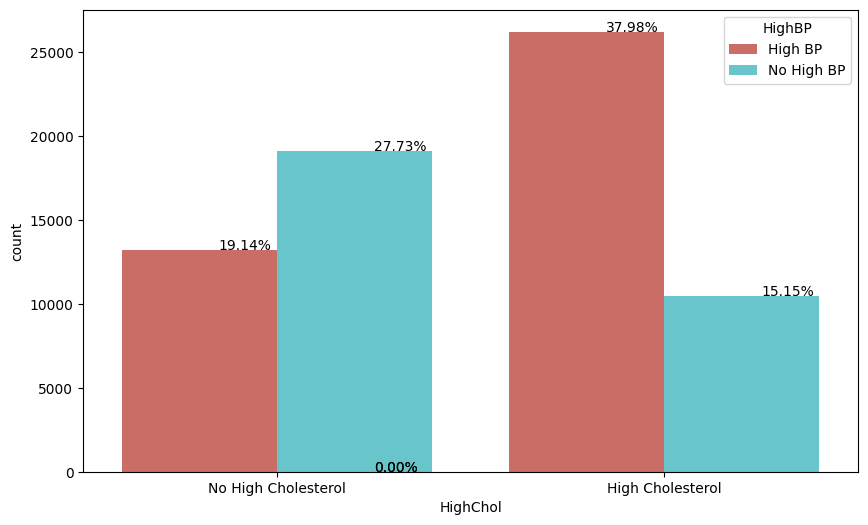

In [63]:
# HighChol with HighBP
plt.figure(figsize=(10,6))
x=sns.countplot(data=df_vis,x='HighChol',hue='HighBP',palette='hls')
for i in x.patches:
    x.annotate('{:.2f}'.format(i.get_height()/df_vis.shape[0]*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

# высокий уровень холестерина и высокое кровяное давление тесно связаны друг с другом, поскольку люди с высоким уровнем холестерина, как правило, имеют высокое кровяное давление.
Связь между высоким BP и высоким уровнем холестерина идет в обоих направлениях. Когда организм не может вывести холестерин из кровотока, этот избыток холестерина может откладываться на стенках артерий. Когда артерии становятся жесткими и сужаются из-за отложений, сердцу приходится работать более интенсивно, чтобы прокачивать по ним кровь. Это приводит к тому, что кровяное давление все более повышается.

# Проверка комбинированного влияния HighBP и HighChol на диабет

Text(0.5, 1.0, 'Комбинированное влияние HighBP и HighChol на диабет')

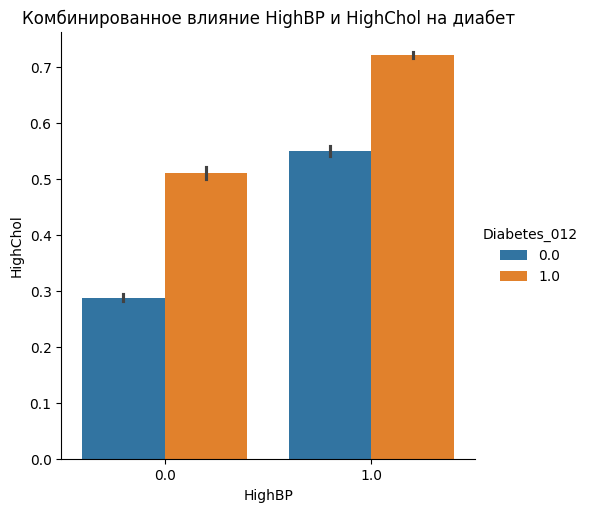

In [64]:
sns.catplot(x="HighBP" , y ="HighChol" , data = data , hue="Diabetes_012" , kind="bar" );
plt.title("Комбинированное влияние HighBP и HighChol на диабет")

# вывод: высокий уровень АД и высокий уровень холестерина одновременно повышают риск развития диабета.

# BMI - Индекс массы тела

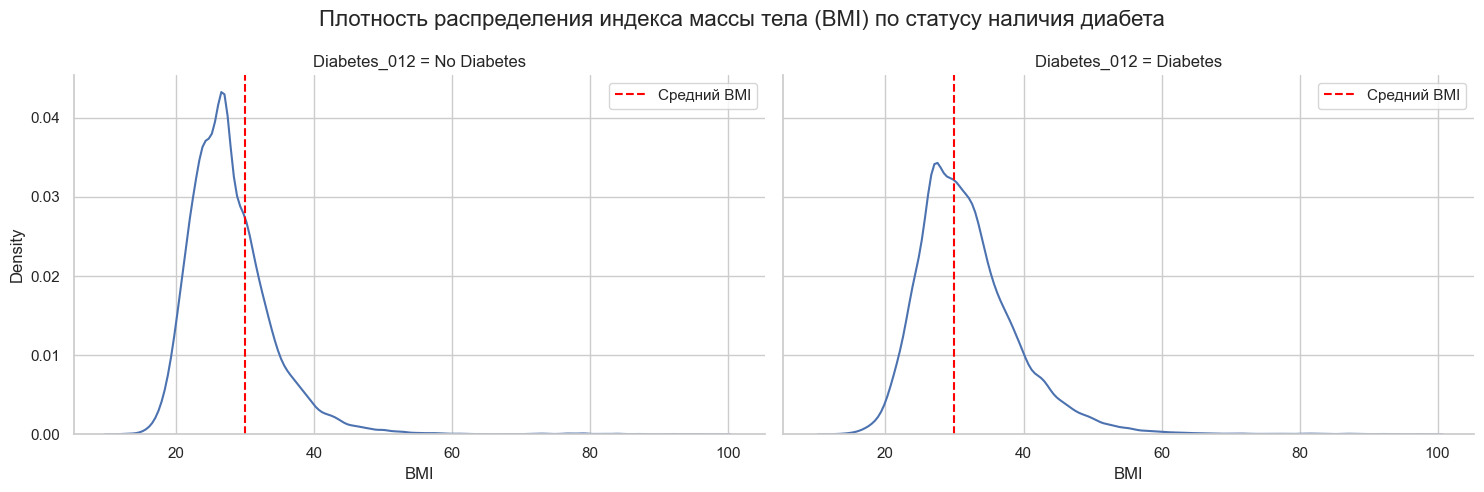

In [65]:
# Установка стиля
sns.set(style="whitegrid")

# Создание графика
g = sns.displot(x='BMI', col='Diabetes_012', data=df_vis, kind="kde", palette="pastel", height=5, aspect=1.5)

# Добавление заголовка
g.fig.suptitle("Плотность распределения индекса массы тела (BMI) по статусу наличия диабета", fontsize=16)
plt.subplots_adjust(top=0.85)  # Увеличьте пространство для заголовка

# Добавление вертикальной линии для среднего значения
mean_bmi = df_vis['BMI'].mean()
for ax in g.axes.flat:
    ax.axvline(mean_bmi, color='red', linestyle='--', label='Средний BMI')
    ax.legend()

plt.show()

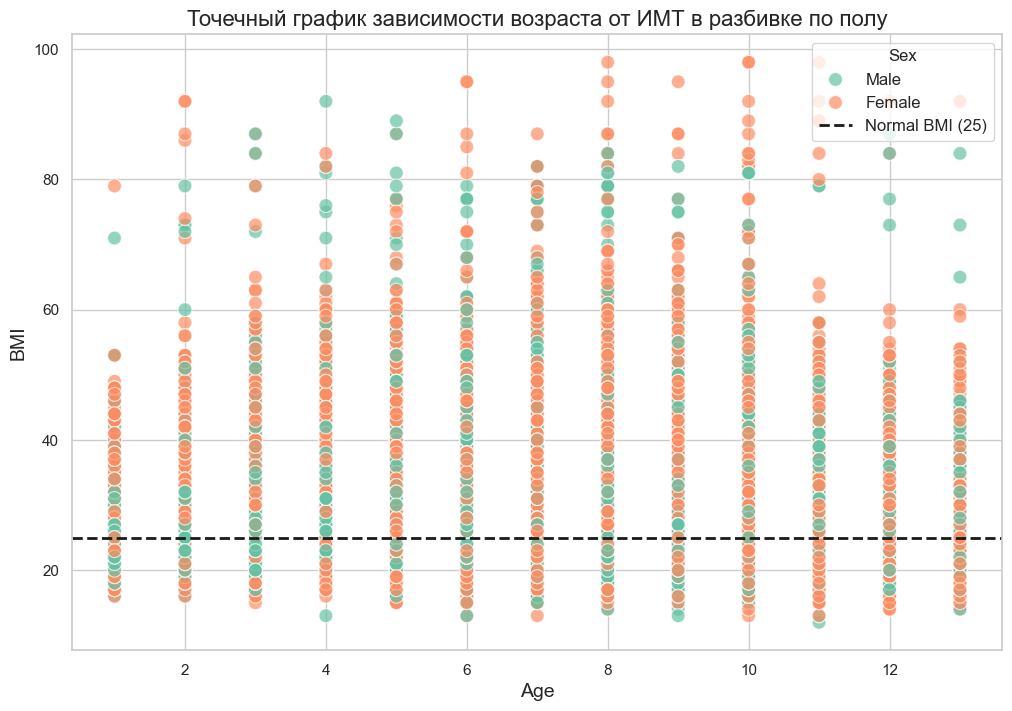

In [66]:
# Set the style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(data=df_vis, x='Age', y='BMI', hue='Sex', palette='Set2', s=100, alpha=0.7)

plt.axhline(y=25, linewidth=2, color='k', linestyle='--', label='Normal BMI (25)')

# titles and labels
plt.title("Точечный график зависимости возраста от ИМТ в разбивке по полу", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("BMI", fontsize=14)

plt.legend(title='Sex', loc='upper right', fontsize=12)
plt.grid(True)

plt.show()

# Вывод: большинство людей из датасета имеют BMI выше нормы (25)

# Разделим людей на группы по BMI (Вес ниже нормы, Нормальный вес, Избыточный вес, Ожирение)

In [67]:
BMI=pd.cut( data['BMI'],bins=[0,18.5,25,30,80],labels=['Underweight','Normal weight','Overweight','Obesity'])

In [68]:
dd=pd.crosstab(df_vis['Diabetes_012'],BMI,rownames=['Diabetes'])
dd=dd.astype(int)
dd

BMI,Underweight,Normal weight,Overweight,Obesity
Diabetes,,,,
Diabetes,169,5350,11419,18118
No Diabetes,480,12317,12379,8755


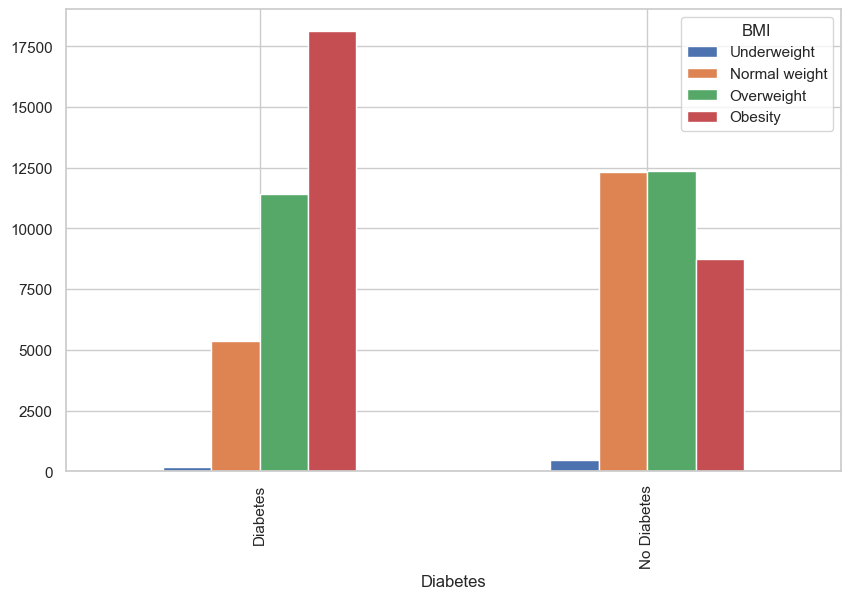

In [69]:
dd.plot(kind="bar",figsize=(10,6));

# Возраст. Поделим по группам

In [70]:
age = pd.cut(df_vis['Age'],bins=[0,4,7,10,12,14],labels=['18:34','35:49','50:64','65:74','75 and older'])
age

0               18:34
1               65:74
2        75 and older
3               65:74
4               50:64
             ...     
70687           35:49
70688           50:64
70689    75 and older
70690           65:74
70691           50:64
Name: Age, Length: 69057, dtype: category
Categories (5, object): ['18:34' < '35:49' < '50:64' < '65:74' < '75 and older']

<Figure size 800x600 with 0 Axes>

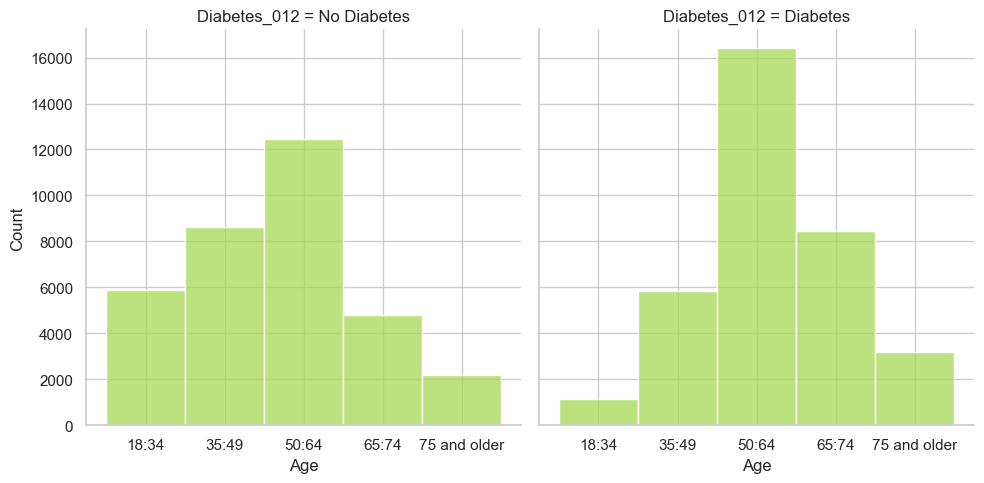

In [71]:
plt.figure(figsize=(8,6))
sns.displot(data=df_vis,col='Diabetes_012',x=age,color='#a6d854');

# Люди в возрасте от 50 до 64 лет имеют более высокий риск развития диабета

# PhysHlth

<Figure size 1200x500 with 0 Axes>

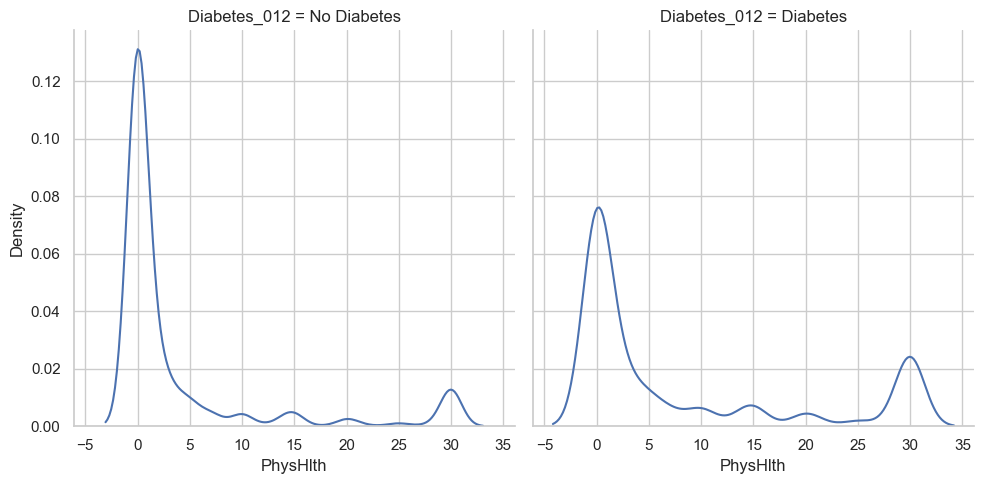

In [72]:
plt.figure(figsize=(12,5))
sns.displot(x='PhysHlth', col='Diabetes_012' , data = df_vis, kind="kde")
plt.show()

# MentHlth

<Figure size 1200x500 with 0 Axes>

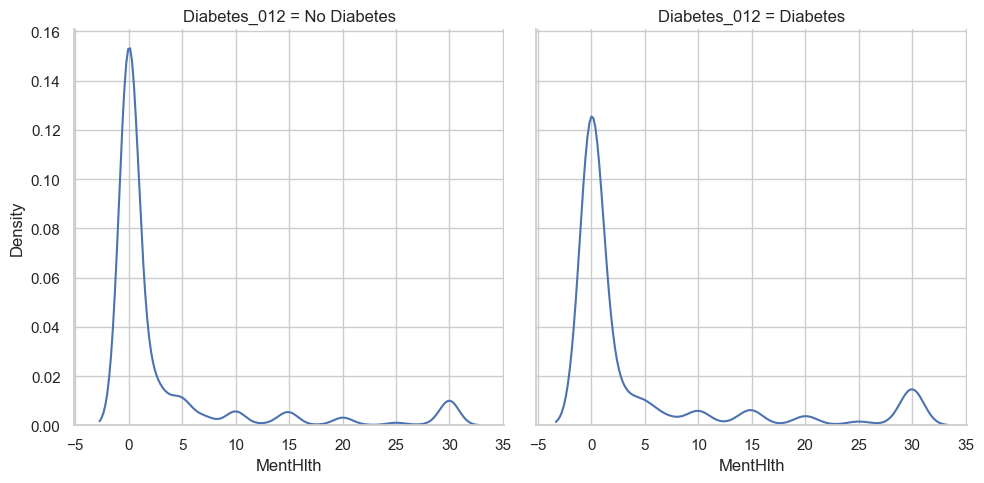

In [73]:
plt.figure(figsize=(12,5))
x= sns.displot(x='MentHlth', col='Diabetes_012', data = df_vis, kind="kde")
plt.show()

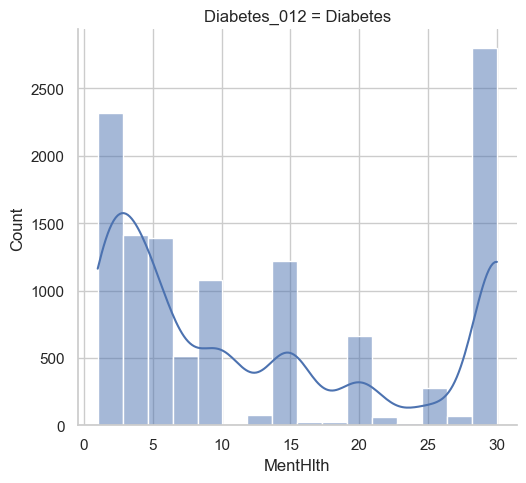

In [74]:
sns.displot(data=df_vis.loc[(df_vis['MentHlth']>0)&(df_vis['Diabetes_012']!="No Diabetes")],x='MentHlth',col='Diabetes_012',col_wrap=2,kde=True);

# Психическое здоровье не влияет на диабет

# GenHlth

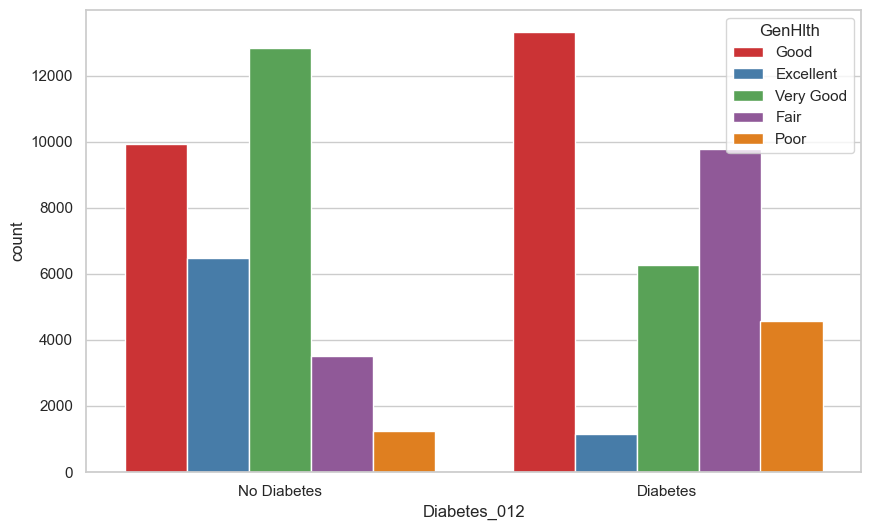

In [75]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_vis,x='Diabetes_012',hue='GenHlth',palette='Set1');

# Общее здоровье оказывает влияние на диабет

# Income ( не оказывает)

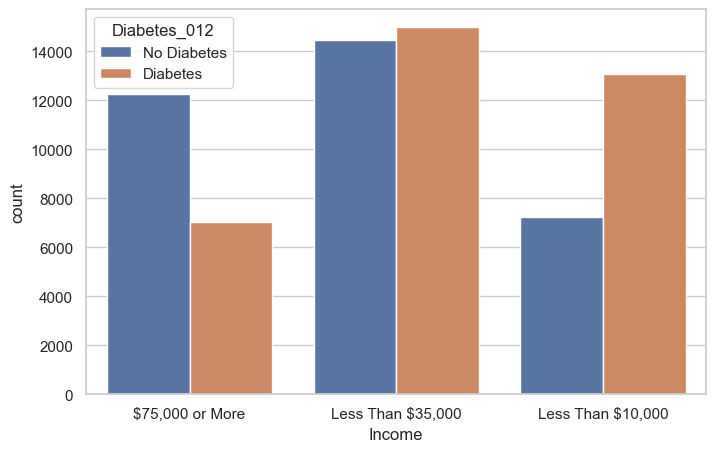

In [76]:
plt.figure(figsize=(8,5))
sns.countplot(x='Income', hue='Diabetes_012' , data = df_vis)
plt.show()

<Figure size 1000x600 with 0 Axes>

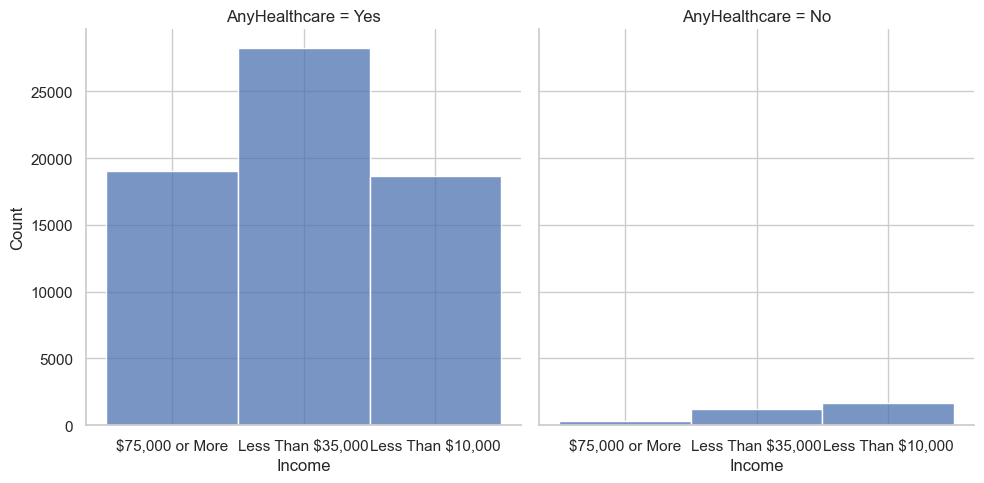

In [77]:
# Влияние дохода на обращение за мед.услугами . Вывод:чем больший доход, тем больше хорошее медицинское обслуживание
plt.figure(figsize=(10,6))
sns.displot(data=df_vis,x='Income',col='AnyHealthcare');

# Education Образование

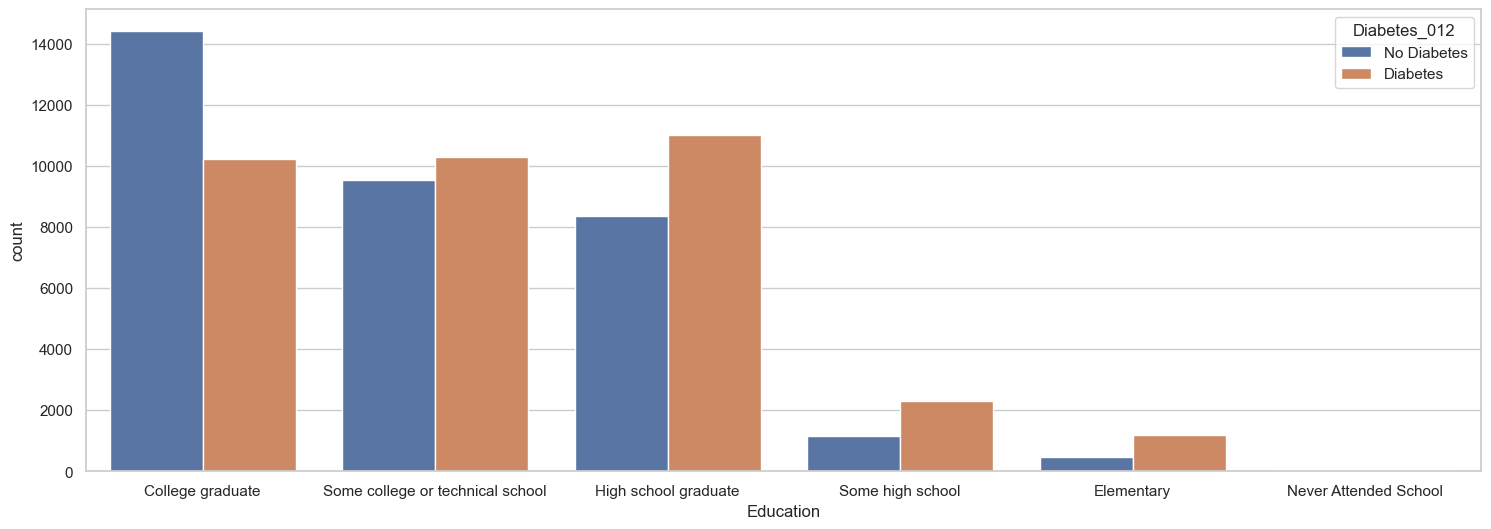

In [78]:
plt.figure(figsize=(18,6))
sns.countplot(x='Education', hue='Diabetes_012' , data = df_vis)
plt.show()

# Veggies

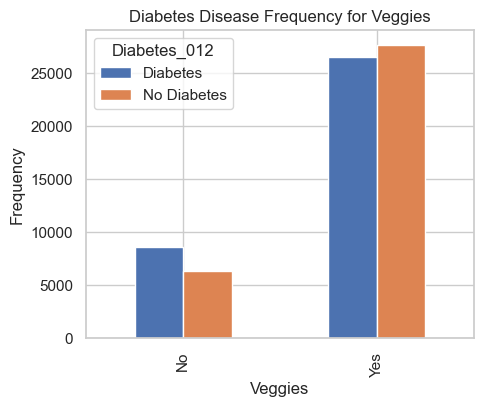

In [79]:
pd.crosstab(df_vis.Veggies,df_vis.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Veggies')
plt.xlabel("Veggies")
plt.ylabel('Frequency')
plt.show()

# Fruits

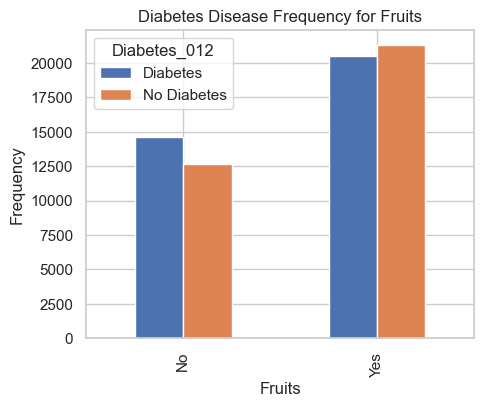

In [80]:
pd.crosstab(df_vis.Fruits,df_vis.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Fruits')
plt.xlabel("Fruits")
plt.ylabel('Frequency')
plt.show()

# PhysActivity

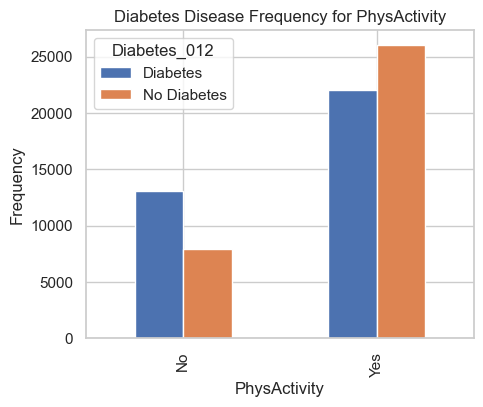

In [81]:
pd.crosstab(df_vis.PhysActivity,df_vis.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for PhysActivity')
plt.xlabel("PhysActivity")
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='PhysActivity', ylabel='count'>

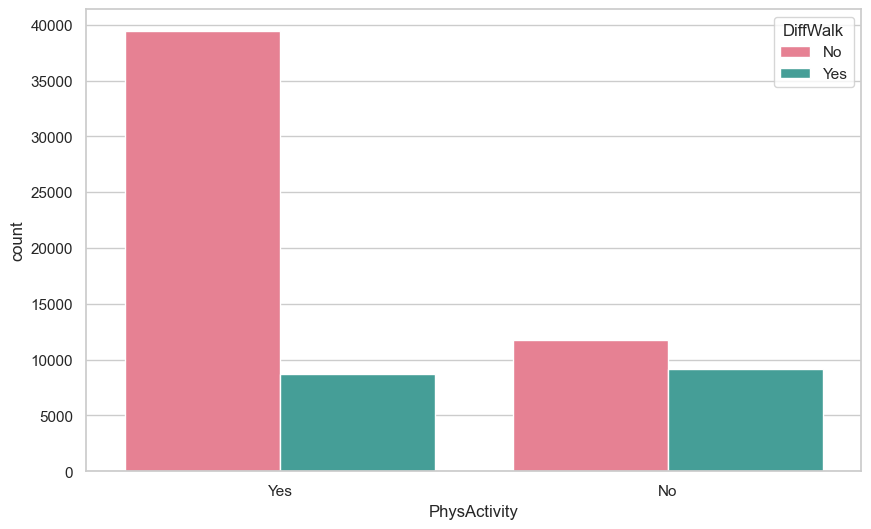

In [82]:
plt.figure(figsize = (10,6))
sns.countplot(data=df_vis,x=df_vis['PhysActivity'],hue='DiffWalk',palette='husl')

<Figure size 1400x600 with 0 Axes>

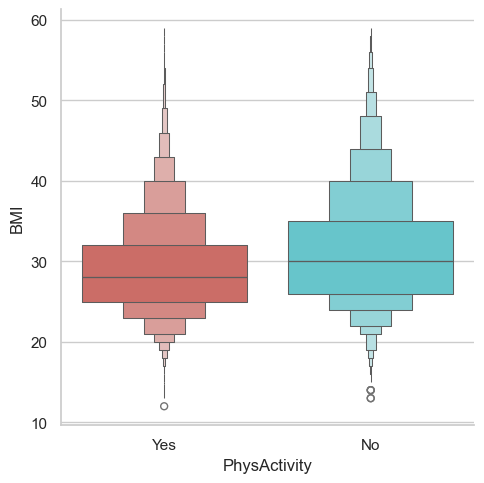

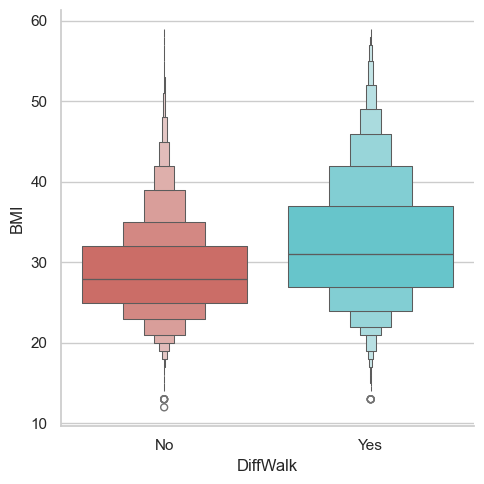

In [83]:
plt.figure(figsize = (14,6))
# plt.subplot(1, 1, 1)
x=sns.catplot(data=df_vis[df_vis['BMI']<60],x="PhysActivity", y="BMI", kind="boxen",aspect=1,palette='hls')
plt.show()

y=sns.catplot(data=df_vis[df_vis['BMI']<60],x="DiffWalk", y="BMI", kind="boxen",aspect=1,palette='hls')
plt.show()


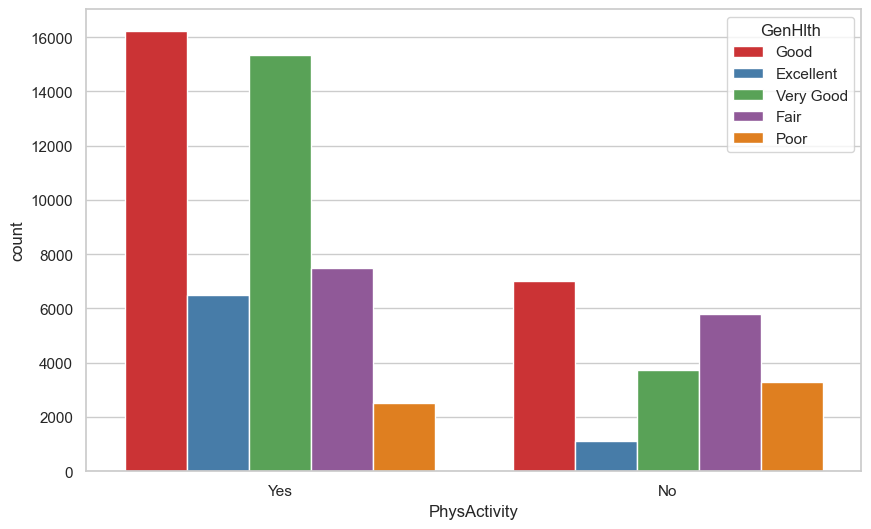

In [84]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_vis,x='PhysActivity',hue='GenHlth',palette='Set1');

# Вывод: физическая активность влияет на общее здоровье, поскольку люди, занимающиеся физическими упражнениями, имеют намного лучшее общее состояние здоровья

# Итоги по визуализации:
1: мужчины и женщины одинаково уязвимы для диабета.
2: люди старше 45 лет более уязвимы для диабета, чем молодые.с увеличением возраста увеличивается и число людей, страдающих диабетом.
3. Более половины диабетиков страдают ожирением, почти половина преддиабетиков страдают ожирением.
4. процент диабетиков и преддиабетиков, страдающих ожирением и избыточным весом, намного выше, чем процент недиабетиков, страдающих ожирением и избыточным весом
5: когда уровень образования повышается, число людей, страдающих диабетом, сокращается.
6: у людей с более низким доходом риск развития диабета выше, чем у людей с более высоким доходом.
7: питание оказывает влияние (потребление овощей и фруктов снижает риск диабета)
8: Физическая активность снижает риск развития диабета.


# Preprocessing // Предварительная подготовка данных

[Text(0, 0, 'Diabetes_012'),
 Text(1, 0, 'HighBP'),
 Text(2, 0, 'HighChol'),
 Text(3, 0, 'CholCheck'),
 Text(4, 0, 'BMI'),
 Text(5, 0, 'Smoker'),
 Text(6, 0, 'Stroke'),
 Text(7, 0, 'HeartDiseaseorAttack'),
 Text(8, 0, 'PhysActivity'),
 Text(9, 0, 'Fruits'),
 Text(10, 0, 'Veggies'),
 Text(11, 0, 'HvyAlcoholConsump'),
 Text(12, 0, 'AnyHealthcare'),
 Text(13, 0, 'NoDocbcCost'),
 Text(14, 0, 'GenHlth'),
 Text(15, 0, 'MentHlth'),
 Text(16, 0, 'PhysHlth'),
 Text(17, 0, 'DiffWalk'),
 Text(18, 0, 'Sex'),
 Text(19, 0, 'Age'),
 Text(20, 0, 'Education'),
 Text(21, 0, 'Income')]

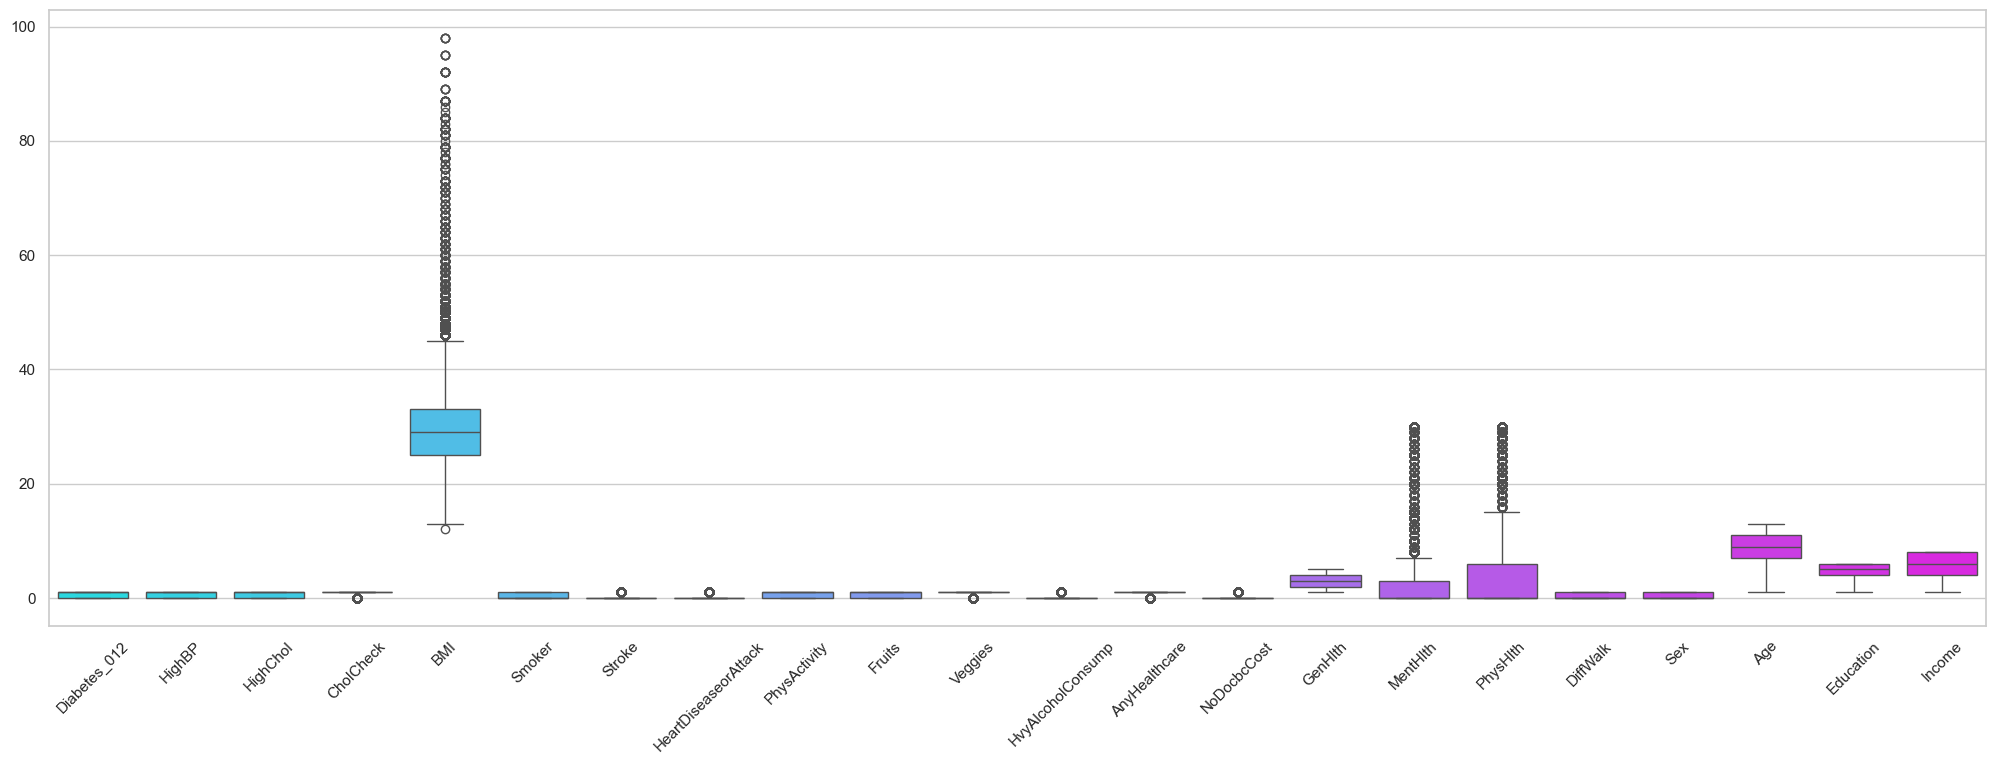

In [85]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data)
u.set_xticklabels(u.get_xticklabels(),rotation=45)

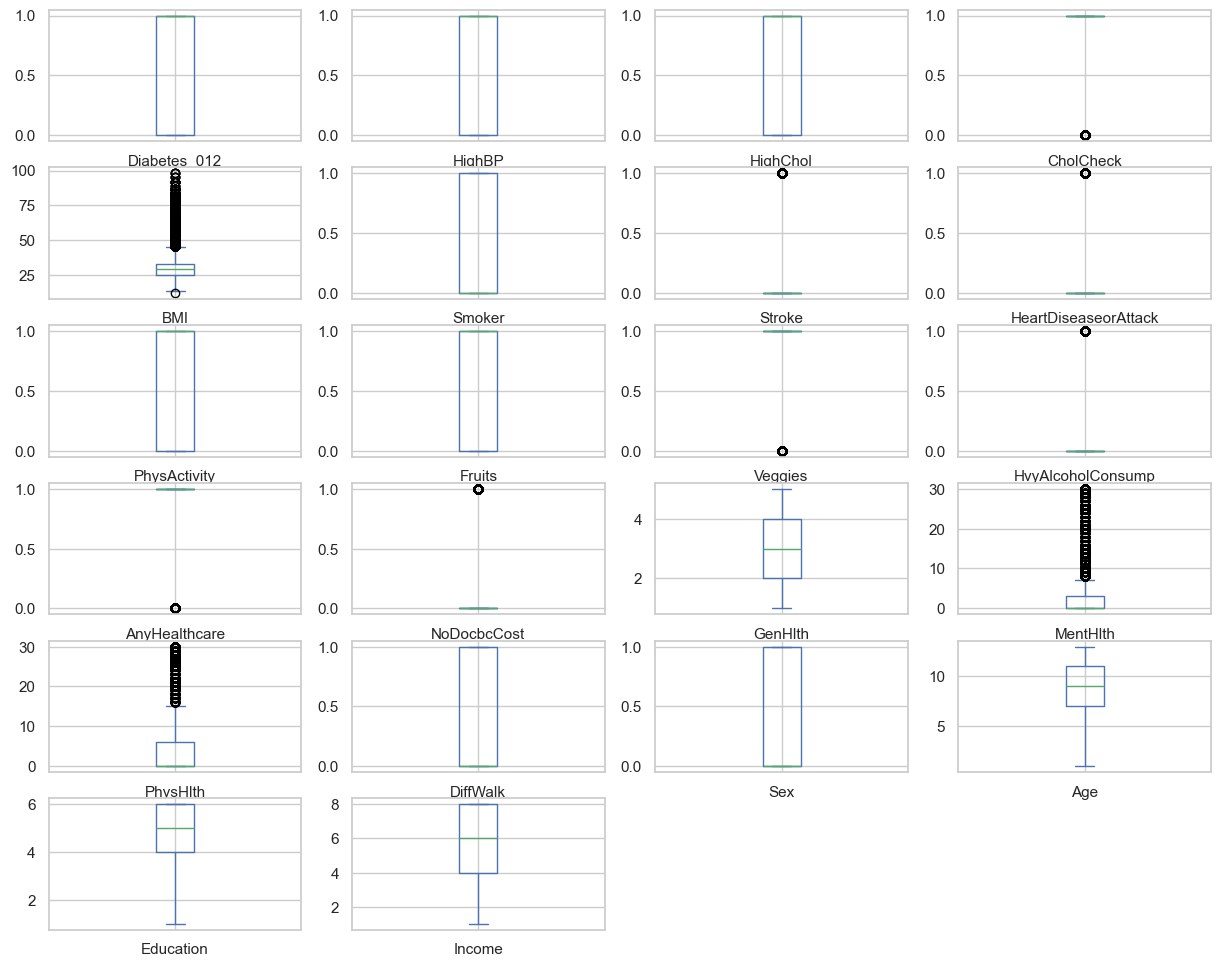

In [86]:
data.plot(kind="box", subplots=True, layout=(7,4), figsize=(15,14));

# Рассмотрим выбросы по BMI

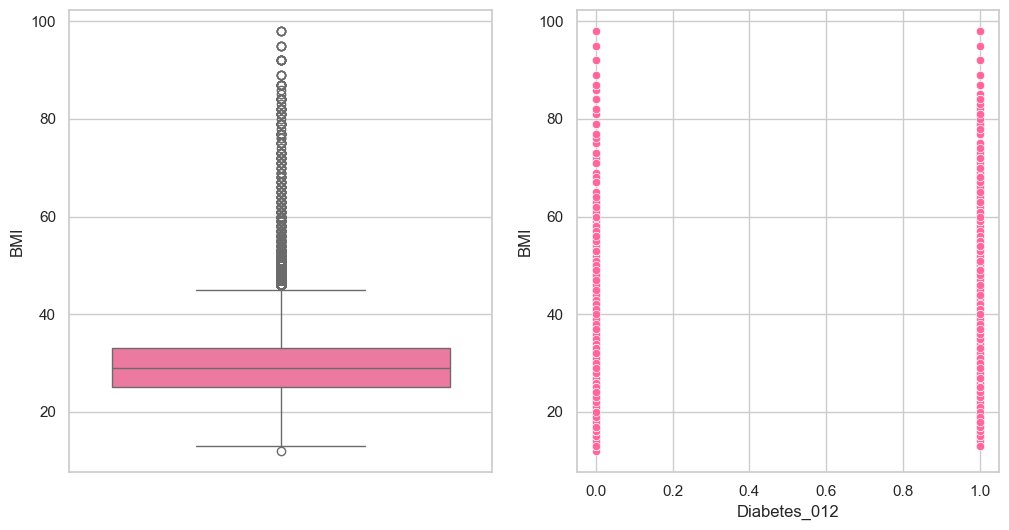

In [87]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data,y='BMI',color='#ff6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=data,x='Diabetes_012',y='BMI',color='#ff6699')
plt.show()

In [88]:
x=data[data['BMI']>=70]
x.shape

(154, 22)

In [89]:
df=data.copy()

In [90]:
df=data[data['BMI']<70]

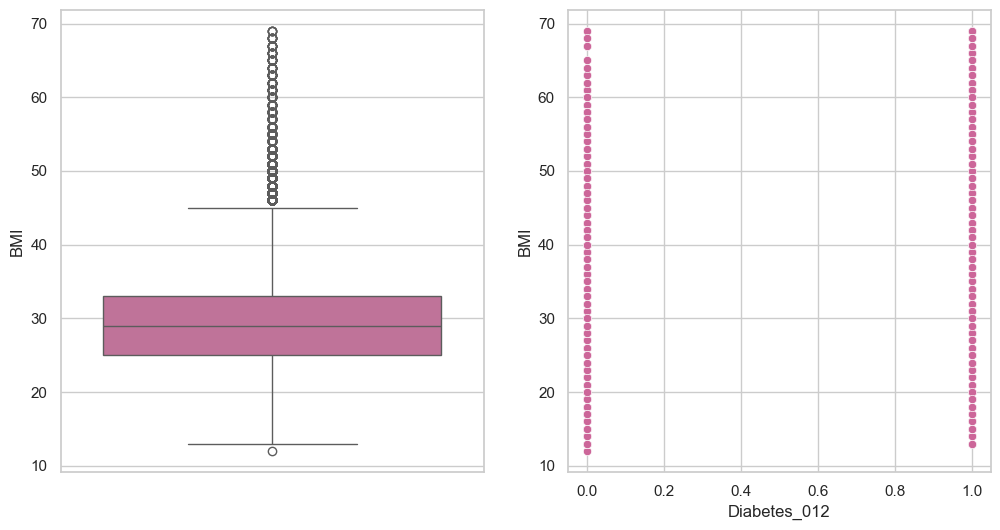

In [91]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df,y='BMI',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df,x='Diabetes_012',y='BMI',color='#cc6699')
plt.show()

In [92]:
df['Diabetes_012'].value_counts()

Diabetes_012
1.0    35016
0.0    33887
Name: count, dtype: int64

# Займемся определением выбросов

In [93]:
from sklearn.ensemble import IsolationForest # Импортируем класс IsolationForest из библиотеки sklearn.ensemble
model = IsolationForest() # Создаем экземпляр модели IsolationForest

# Обучаем модель на данных из DataFrame df
model.fit(df)

# Вычисляем аномальные оценки для каждого наблюдения в df
# df['anomailes_scores'] = model.decision_function(df)

# Предсказываем аномалии в данных: 1 - нормальные, -1 - аномальные
df['anomaly'] = model.predict(df)

In [94]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0,-1
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0,-1
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0,1
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0,1
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0,-1
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0,-1
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0,-1
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,-1


# Исключим аномалии (-1)

In [95]:
df[df['anomaly']==-1] # выберем аномалии (каждый раз их колич.меняется)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0,-1
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0,-1
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0,-1
13,0.0,1.0,0.0,1.0,58.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,3.0,0.0,1.0,10.0,4.0,6.0,-1
14,0.0,0.0,1.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,10.0,5.0,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0,-1
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0,-1
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0,-1
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,-1


In [96]:
df[df['anomaly']==-1].shape

(27177, 23)

In [97]:
df.drop(df[df['anomaly']==-1].index,inplace = True)

In [98]:
df.shape

(41726, 23)

In [99]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0,1
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0,1
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0,1
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0,1
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70676,1.0,0.0,0.0,1.0,33.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,3.0,1
70678,1.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,10.0,0.0,0.0,7.0,5.0,7.0,1
70681,1.0,0.0,1.0,1.0,19.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,2.0,0.0,0.0,7.0,6.0,6.0,1
70683,1.0,1.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,4.0,3.0,1


# Drop column(anomaly)

In [100]:
df.drop(columns=['anomaly'], inplace=True)

In [101]:
df.shape

(41726, 22)

# Масштабирование данных (Scaling data)

In [102]:
x = df.drop(['Diabetes_012'],axis=1)
y = df['Diabetes_012']

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [111]:
scaled_features = scaler.transform(x)
x = pd.DataFrame(scaled_features,columns=df.columns[1:])
x.head(10)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,-1.040657,-0.993217,0.078569,-0.518043,-0.862236,-0.061652,-0.251163,0.475973,0.703196,0.386458,-0.156216,0.090099,-0.131286,-1.662484,-0.331094,1.890966,-0.322005,1.088029,1.578983,0.973348,0.916400
1,0.960931,1.006830,0.078569,-0.163382,1.159776,-0.061652,-0.251163,0.475973,0.703196,0.386458,-0.156216,0.090099,-0.131286,0.610860,-0.331094,0.298076,-0.322005,1.088029,0.871915,0.973348,0.916400
2,-1.040657,-0.993217,0.078569,0.013948,1.159776,-0.061652,-0.251163,0.475973,0.703196,0.386458,-0.156216,0.090099,-0.131286,-0.525812,-0.331094,-0.384591,-0.322005,-0.919093,-0.188688,-0.156071,0.916400
3,-1.040657,1.006830,0.078569,-0.518043,1.159776,-0.061652,-0.251163,0.475973,0.703196,0.386458,6.401396,0.090099,-0.131286,-1.662484,-0.331094,-0.384591,-0.322005,1.088029,1.578983,-0.156071,-0.196925
4,-1.040657,-0.993217,0.078569,0.368609,1.159776,-0.061652,-0.251163,-2.100961,0.703196,0.386458,-0.156216,0.090099,-0.131286,1.747531,-0.331094,-0.384591,-0.322005,1.088029,-0.895757,-1.285490,-1.866912
5,-1.040657,-0.993217,0.078569,0.545939,-0.862236,-0.061652,-0.251163,0.475973,0.703196,0.386458,-0.156216,0.090099,-0.131286,0.610860,-0.331094,-0.384591,-0.322005,-0.919093,-1.956360,0.973348,0.916400
6,-1.040657,-0.993217,0.078569,-0.340713,1.159776,-0.061652,-0.251163,-2.100961,0.703196,0.386458,-0.156216,0.090099,-0.131286,0.610860,-0.331094,0.980743,-0.322005,1.088029,-0.895757,-1.285490,-1.310250
7,0.960931,1.006830,0.078569,-0.872704,1.159776,-0.061652,3.981480,0.475973,0.703196,0.386458,-0.156216,0.090099,-0.131286,0.610860,-0.331094,0.525631,-0.322005,-0.919093,1.225449,-1.285490,-0.196925
8,-1.040657,-0.993217,0.078569,-1.404694,-0.862236,-0.061652,-0.251163,0.475973,0.703196,0.386458,-0.156216,0.090099,-0.131286,-1.662484,-0.331094,-0.384591,-0.322005,1.088029,-1.602826,0.973348,0.916400
9,0.960931,1.006830,0.078569,-0.340713,-0.862236,-0.061652,-0.251163,0.475973,0.703196,0.386458,-0.156216,0.090099,-0.131286,-0.525812,-0.331094,-0.384591,-0.322005,1.088029,-0.542223,0.973348,0.916400


In [112]:
# Разделим данные (Split the data)

x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.35, random_state=0, shuffle =True)

# До обучающих моделей
# создаем DataFrame изобучающих данных xre_train и добавляем целевой признак yre_train.
df_train = pd.DataFrame(x_train, columns=['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 
                                             'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 
                                             'Fruits', 'Veggies', 'HvyAlcoholConsump', 
                                             'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 
                                             'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 
                                             'Age', 'Education', 'Income'])

df_train['Target'] = yre_train  # Добавляем целевой признак

# Вычисление корреляции
correlation_matrix = df_train.corr()

# Визуализация с помощью тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [114]:
y_pred = knn.predict(x_test)

In [115]:
y_pred

array([0., 0., 0., ..., 1., 1., 0.])

In [116]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    23489
1.0    18237
Name: count, dtype: int64

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.74      0.74      8222
         1.0       0.67      0.67      0.67      6383

    accuracy                           0.71     14605
   macro avg       0.70      0.70      0.70     14605
weighted avg       0.71      0.71      0.71     14605



In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))

[[6078 2144]
 [2110 4273]]


# Вывод: Из-за несбалансированности данных точность определения больных диабетом низкая, поэтому используем SMOTE + ENN SMOTE --> Метод синтетической передискретизации меньшинства SMOTE + ENN - это метод, в котором больше нет. количество наблюдений удаляется из пространства выборки. ENN - это метод занижения выборки, при котором оцениваются ближайшие соседи каждого из мажоритарного класса. Если ближайшие соседи неправильно классифицируют этот конкретный экземпляр мажоритарного класса, то этот экземпляр удаляется. Интеграция этого метода с данными с избыточной выборкой, выполненная SMOTE, помогает выполнить обширную очистку данных. Здесь при неправильной классификации NN образцы из обоих классов удалены. Это приводит к более четкому и сжатому разделению классов.

# Повторная выборка // Resampling

In [119]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x,y)

In [120]:
xre_train,xre_test,yre_train,yre_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [121]:
knn_smote = KNeighborsClassifier(n_neighbors = 5)
knn_smote.fit(xre_train,yre_train)

KNeighborsClassifier()

In [122]:
yre_pred = knn_smote.predict(xre_test)

In [123]:
print(classification_report(yre_test,yre_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3120
           1       0.95      0.95      0.95      3151

    accuracy                           0.95      6271
   macro avg       0.95      0.95      0.95      6271
weighted avg       0.95      0.95      0.95      6271



# Modeling

1. ***Decision tree***

In [124]:
dt= DecisionTreeClassifier(criterion= 'entropy',max_depth=40)
dt.fit(xre_train , yre_train)

DecisionTreeClassifier(criterion='entropy', max_depth=40)

In [125]:
# Вывод размеров выборок
print(f'Размер обучающей выборки: {xre_train.shape[0]}')
print(f'Размер тестовой выборки: {xre_test.shape[0]}')

Размер обучающей выборки: 14630
Размер тестовой выборки: 6271


In [126]:
print(dt.score(xre_train , yre_train))
print(dt.score(xre_test, yre_test))

1.0
0.9335034284803062


In [127]:
y_pred_train_dt = dt.predict(xre_train)
acc_train_dt = accuracy_score(yre_train, y_pred_train_dt)

y_pred_test_dt = dt.predict(xre_test)
acc_test_dt = accuracy_score(yre_test, y_pred_test_dt)
print(acc_train_dt)
print(acc_test_dt)

1.0
0.9335034284803062


In [128]:
# Вычисление MSE и MAE
mse = mean_squared_error(yre_test, y_pred_test_dt)
mae = mean_absolute_error(yre_test, y_pred_test_dt)

# Вывод результатов
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.06649657151969383
Mean Absolute Error (MAE): 0.06649657151969383


In [129]:
from sklearn.metrics import classification_report
print(classification_report(yre_test, y_pred_test_dt))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      3120
         1.0       0.94      0.93      0.93      3151

    accuracy                           0.93      6271
   macro avg       0.93      0.93      0.93      6271
weighted avg       0.93      0.93      0.93      6271



In [130]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_dt,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_dt,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_dt,average="micro"))

Precision: 0.934
Recall: 0.934
F-measure: 0.934


In [131]:
from sklearn.metrics import roc_auc_score

# Получим прогнозируемые вероятности для обоих классов
y_pred_prob_dt = dt.predict_proba(xre_test)

# Извлечем вероятности для положительного класса (класс 1)
y_pred_prob_positive = y_pred_prob_dt[:, 1]

# Calculate ROC AUC score
roc_auc_score_dt = roc_auc_score(yre_test, y_pred_prob_positive)
print('ROC AUC Score:', roc_auc_score_dt)

ROC AUC Score: 0.9335167814043568


In [132]:
import sklearn
print(sklearn.__version__)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


1.6.0


In [133]:
from sklearn.metrics import ConfusionMatrixDisplay

<Figure size 800x600 with 0 Axes>

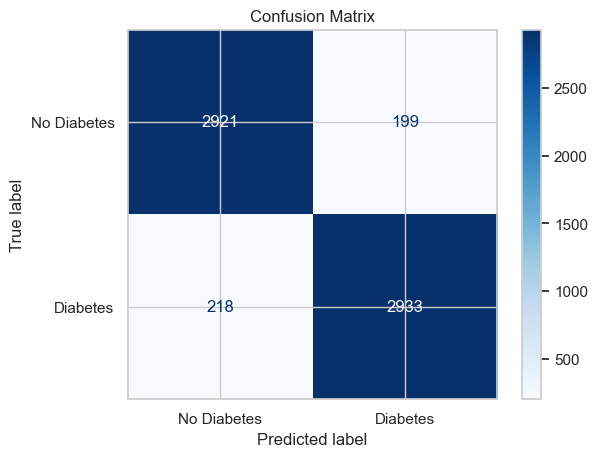

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      3120
         1.0       0.94      0.93      0.93      3151

    accuracy                           0.93      6271
   macro avg       0.93      0.93      0.93      6271
weighted avg       0.93      0.93      0.93      6271



In [134]:
# Функция для визуализации Confusion Matrix
def plot_confusion_matrix(yre_test, y_pred_test_dt, class_names):
    """
    Функция для визуализации матрицы ошибок.
    
    :param y_test: Истинные значения
    :param y_pred_test_dt: Предсказанные значения
    :param class_names: Названия классов
    """
    cm = confusion_matrix(yre_test, y_pred_test_dt)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    
    plt.figure(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Визуализация Confusion Matrix
class_names = ['No Diabetes',  'Diabetes']
plot_confusion_matrix(yre_test, y_pred_test_dt, class_names)

# Вывод отчета о классификации
print(classification_report(yre_test, y_pred_test_dt))

# Вывод предсказаний
results_df = pd.DataFrame({
    'True Values': yre_test,
    'Predictions': y_pred_test_dt
})

In [135]:
scores = cross_val_score(dt, xre_train, yre_train, cv=5)
print(f"Средняя точность кросс-валидации: {scores.mean():.2f}")

Средняя точность кросс-валидации: 0.93


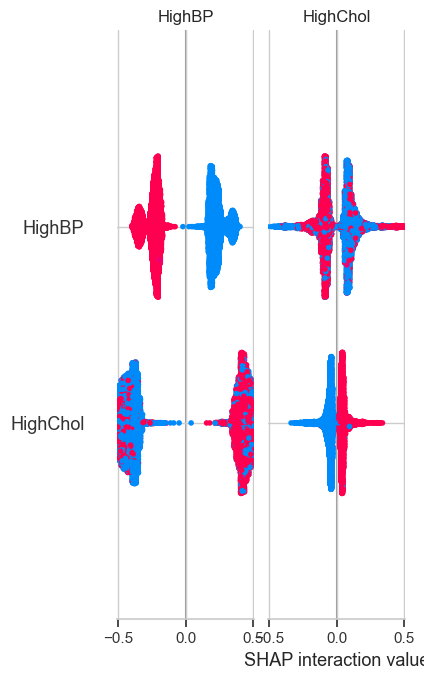

In [136]:
import shap
# Важность признаков с помощью SHAP
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(xre_train)

# Визуализация важности признаков
shap.summary_plot(shap_values, xre_train)

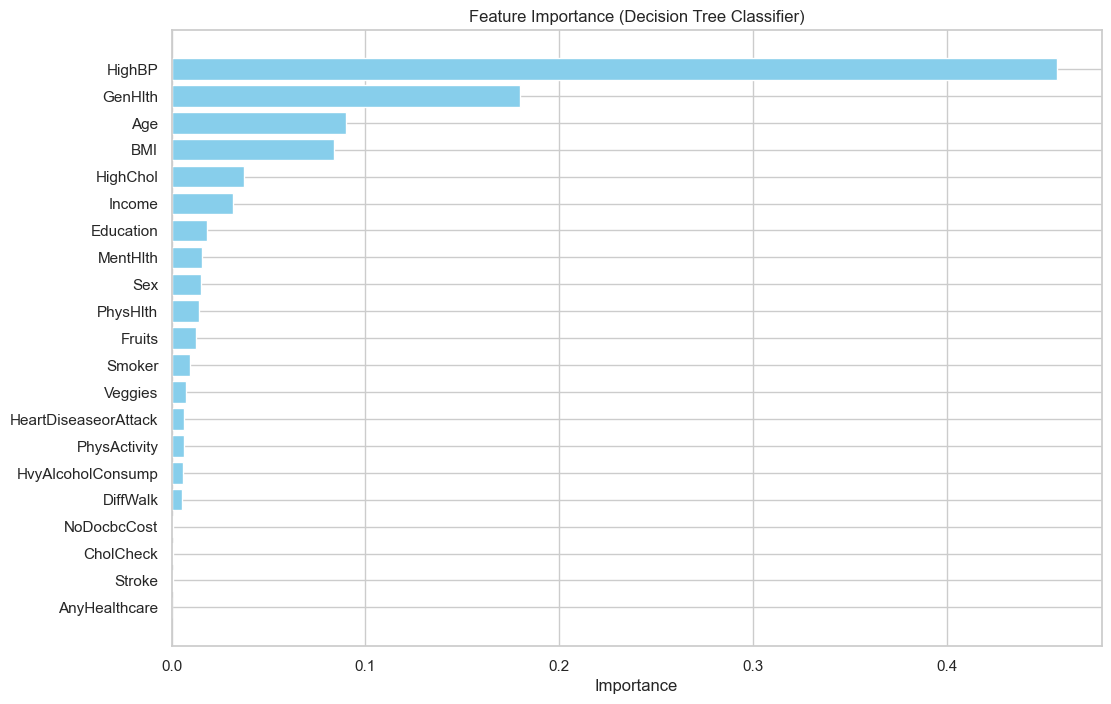

In [137]:
# Визуализация важностей признаков
importances = dt.feature_importances_
feature_names = xre_train.columns  # Или используйте список имен признаков

# Создаем DataFrame для удобного отображения
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Сортируем по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Построение графика
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Decision Tree Classifier)')
plt.gca().invert_yaxis()  # Инвертируем ось Y, чтобы наиболее важные признаки были сверху
plt.show()

2. ***Random Forest***

In [138]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features=16 , max_depth=16)
rf.fit(xre_train,yre_train)

RandomForestClassifier(max_depth=16, max_features=16)

In [139]:
# Вывод размеров выборок
print(f'Размер обучающей выборки: {xre_train.shape[0]}')
print(f'Размер тестовой выборки: {xre_test.shape[0]}')

Размер обучающей выборки: 14630
Размер тестовой выборки: 6271


In [145]:
print(rf.score(xre_train, yre_train))
print(rf.score(xre_test, yre_test))

# вот и проверим на тестовой, чтоб избежать переобучения

accuracy = rf.score(xre_test, yre_test)
print(f"Точность модели с max_depth=None: {accuracy:.2f}")

# Попробуем кросс-валидацию

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, xre_train, yre_train, cv=5)
print(f"Средняя точность кросс-валидации: {scores.mean():.2f}")

y_pred_train_rf = rf.predict(xre_train)
acc_train_rf = accuracy_score(yre_train, y_pred_train_rf)

y_pred_test_rf = rf.predict(xre_test)
acc_test_rf = accuracy_score(yre_test, y_pred_test_rf)
print("Accuracy train: ", acc_train_rf)
print("Accuracy test: ", acc_test_rf)

print(classification_report(yre_test, y_pred_test_rf))

print('Precision: %.3f' % precision_score(yre_test, y_pred_test_rf,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_rf,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_rf,average="micro"))

# Получим прогнозируемые вероятности для обоих классов
y_pred_prob_rf = rf.predict_proba(xre_test)

# Извлечем вероятности для положительного класса (класс 1)
y_pred_prob_positive = y_pred_prob_rf[:, 1]

# Calculate ROC AUC score
roc_auc_score_rf = roc_auc_score(yre_test, y_pred_prob_positive)
print('ROC AUC Score:', roc_auc_score_rf)

0.9991797676008203
0.9537553819167597
Точность модели с max_depth=None: 0.95
Средняя точность кросс-валидации: 0.95
Accuracy train:  0.9991797676008203
Accuracy test:  0.9537553819167597
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      3120
         1.0       0.95      0.96      0.95      3151

    accuracy                           0.95      6271
   macro avg       0.95      0.95      0.95      6271
weighted avg       0.95      0.95      0.95      6271

Precision: 0.954
Recall: 0.954
F-measure: 0.954
ROC AUC Score: 0.9901293036805572


***3 KNN***

In [146]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(xre_train,yre_train) # xre_train-обучающий набор признаков, yre_train - целевой набор

KNeighborsClassifier(n_neighbors=4)

In [147]:
y_pred_train_knn = knn.predict(xre_train)
acc_train_knn = accuracy_score(yre_train, y_pred_train_knn)

y_pred_test_knn= knn.predict(xre_test)
acc_test_knn = accuracy_score(yre_test, y_pred_test_knn)
print(acc_train_knn)
print(acc_test_knn)

0.9770334928229665
0.9535959177164727


In [148]:
# make predictions on test set
y_pred=knn.predict(x_test)

print('Training set score: {:.4f}'.format(knn.score(xre_train,yre_train)))
print('Test set score: {:.4f}'.format(knn.score(xre_test, yre_test)))
mse_knn = mean_squared_error(yre_test,y_pred_test_knn)
print('MSE_knn: %.3f' % mse_knn)
mae_knn = mean_absolute_error(yre_test, y_pred_test_knn)
print('MAE_knn: %.3f' % mae_knn)

Training set score: 0.9770
Test set score: 0.9536
MSE_knn: 0.046
MAE_knn: 0.046


In [149]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_knn,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_knn,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_knn,average="micro"))

Precision: 0.954
Recall: 0.954
F-measure: 0.954


In [150]:
knn_report = classification_report(yre_test,y_pred_test_knn)
print(knn_report)

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      3120
         1.0       0.96      0.94      0.95      3151

    accuracy                           0.95      6271
   macro avg       0.95      0.95      0.95      6271
weighted avg       0.95      0.95      0.95      6271



In [151]:
# Получаем предсказанные вероятности для обоих классов
y_pred_prob_knn = knn.predict_proba(xre_test)

# Извлекаем вероятности для положительного класса (класс 1)
y_pred_prob_positive_knn = y_pred_prob_knn[:, 1]

# Вычисляем ROC AUC score
roc_auc_score_knn = roc_auc_score(yre_test, y_pred_prob_positive_knn)
print('ROC AUC Score:', roc_auc_score_knn)

ROC AUC Score: 0.9842660347956286


***4 Extra Trees (Extremly Randomized Trees)*** 
алгоритм машинного обучения, который относится к семейству ансамблевых методов, использующих принцип "деревьев решений". 
Разработан для улучшения производительности моделей, используя несколько деревьев и объединяя их предсказания.

Объединяет множество деревьев решений для улучшения точности и устойчивости модели. Это аналогично методу случайного леса (Random Forest), но с некоторыми различиями.
При построении каждого дерева Extra Trees случайным образом выбирает подмножество признаков, что уменьшает переобучение.
В отличие от Random Forest, который выбирает наилучший порог для каждого признака, Extra Trees выбирает пороги случайным образом. Это приводит к большей случайности и может улучшить производительность модели.
Extra Trees обычно обучаются быстрее, чем Random Forest, из-за случайного выбора порогов.

In [152]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()

In [153]:
etc.fit(xre_train,yre_train)

ExtraTreesClassifier()

In [154]:
yhat = etc.predict(xre_test)

In [155]:
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(yre_train,etc.predict(xre_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(yre_test,yhat)*100)

Train set Accuracy : 100.0
Test set Accuracy : 96.76287673417318


In [156]:
# Получаем предсказанные вероятности для обоих классов
y_pred_prob_etc = etc.predict_proba(xre_test)

# Извлекаем вероятности для положительного класса (класс 1)
y_pred_prob_positive_etc = y_pred_prob_etc[:, 1]

# Вычисляем ROC AUC score
roc_auc_score_etc = roc_auc_score(yre_test, y_pred_prob_positive_etc)
print('ROC AUC Score:', roc_auc_score_etc)

ROC AUC Score: 0.9949776322534971


# Оценка точности

In [157]:
y_pred_train_etc= etc.predict(xre_train)
acc_train_etc= accuracy_score(yre_train, y_pred_train_etc)

y_pred_test_etc= etc.predict(xre_test)
acc_test_etc = accuracy_score(yre_test, y_pred_test_etc)
print(acc_train_etc)
print(acc_test_etc)

1.0
0.9676287673417318


# Показатели Precision, Recall и F1

In [158]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_etc,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_etc,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_etc,average="micro"))

Precision: 0.968
Recall: 0.968
F-measure: 0.968


In [159]:
xre_train.shape

(14630, 21)

In [160]:
etc_report = classification_report(yre_test, y_pred_test_etc)
print(etc_report)

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      3120
         1.0       0.97      0.97      0.97      3151

    accuracy                           0.97      6271
   macro avg       0.97      0.97      0.97      6271
weighted avg       0.97      0.97      0.97      6271



***5. Bagging***

In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
tree_clas = DecisionTreeClassifier(random_state=100)

In [162]:
bagging_model = BaggingClassifier(
estimator = DecisionTreeClassifier(),
n_estimators = 100,
max_samples = 0.8,
oob_score=True,
random_state = 100
)

In [163]:
bagging_model.fit(xre_train, yre_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=100)

In [164]:
y_pred_train_bagging_model = bagging_model.predict(xre_train)
acc_train_bagging_model = accuracy_score(yre_train, y_pred_train_bagging_model)

y_pred_test_bagging_model = bagging_model.predict(xre_test)
acc_test_bagging_model = accuracy_score(yre_test, y_pred_test_bagging_model)
print(acc_train_bagging_model)
print(acc_test_bagging_model)

0.9987012987012988
0.9526391325147504


In [165]:
bagging_model.oob_score_

0.9559808612440192

In [166]:
# Получим прогнозируемые вероятности для обоих классов
y_pred_prob_bagging_model = bagging_model.predict_proba(xre_test)

# Извлечем вероятности для положительного класса (класс 1)
y_pred_prob_positive = y_pred_prob_bagging_model[:, 1]

# Calculate ROC AUC score
roc_auc_score_rf = roc_auc_score(yre_test, y_pred_prob_positive)
print('ROC AUC Score:', roc_auc_score_rf)

ROC AUC Score: 0.9893529933517239


In [167]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_bagging_model,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_bagging_model,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_bagging_model,average="micro"))

Precision: 0.953
Recall: 0.953
F-measure: 0.953


In [168]:
# Получаем предсказанные вероятности для обоих классов
y_pred_prob_bagging_model = bagging_model.predict_proba(xre_test)

# Извлекаем вероятности для положительного класса (класс 1)
y_pred_prob_positive_bagging_model = y_pred_prob_bagging_model[:, 1]

# Вычисляем ROC AUC score
roc_auc_score_bagging_model = roc_auc_score(yre_test, y_pred_prob_positive_bagging_model)
print('ROC AUC Score:', roc_auc_score_bagging_model)

ROC AUC Score: 0.9893529933517239


***6 Logistic Regression***

In [169]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (classification_report, accuracy_score, 
                             mean_squared_error, mean_absolute_error, 
                             precision_score, recall_score, f1_score, 
                             roc_auc_score)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [170]:
# Создаем модель
lg = LogisticRegression(penalty='l1', C=1.0, random_state=0, solver='liblinear', class_weight='balanced')

# Балансировка классов с помощью SMOTE
smote = SMOTE()
xre_train, yre_train = smote.fit_resample(xre_train, yre_train)
print(pd.Series(yre_train).value_counts())

In [171]:
# Выполняем кросс-валидацию
cv_scores = cross_val_score(lg, xre_train, yre_train, cv=5)  # cv=5 означает 5 фолдов
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.94805195 0.9429255  0.94531784 0.93848257 0.94360902]


In [172]:
lg.fit(xre_train, yre_train)  # Обучаем модель


LogisticRegression(class_weight='balanced', penalty='l1', random_state=0,
                   solver='liblinear')

In [173]:
print(lg.score(xre_train, yre_train))
print(lg.score(xre_test, yre_test))

0.9446343130553657
0.9400414606920746


In [174]:
y_pred_train_lg = lg.predict(xre_train)
acc_train_lg = accuracy_score(yre_train, y_pred_train_lg)

y_pred_test_lg = lg.predict(xre_test)
acc_test_lg = accuracy_score(yre_test, y_pred_test_lg)
print(acc_train_lg)
print(acc_test_lg)

# Расчет ошибок
print(f'MSE: { mean_squared_error(yre_test, y_pred_test_lg)}')
print(f'MAE: { mean_absolute_error(yre_test, y_pred_test_lg)}')

print(classification_report(yre_test, y_pred_test_lg))

0.9446343130553657
0.9400414606920746
MSE: 0.05995853930792537
MAE: 0.05995853930792537
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      3120
         1.0       0.94      0.94      0.94      3151

    accuracy                           0.94      6271
   macro avg       0.94      0.94      0.94      6271
weighted avg       0.94      0.94      0.94      6271



In [175]:
# Получаем предсказанные вероятности для обоих классов
y_pred_prob_lg = lg.predict_proba(xre_test)

# Извлекаем вероятности для положительного класса (класс 1)
y_pred_prob_positive_lg = y_pred_prob_lg[:, 1]

# Вычисляем ROC AUC score
roc_auc_score_lg = roc_auc_score(yre_test, y_pred_prob_positive_lg)
print('ROC AUC Score:', roc_auc_score_lg)

ROC AUC Score: 0.9849227758383582


# Визуализация признаков

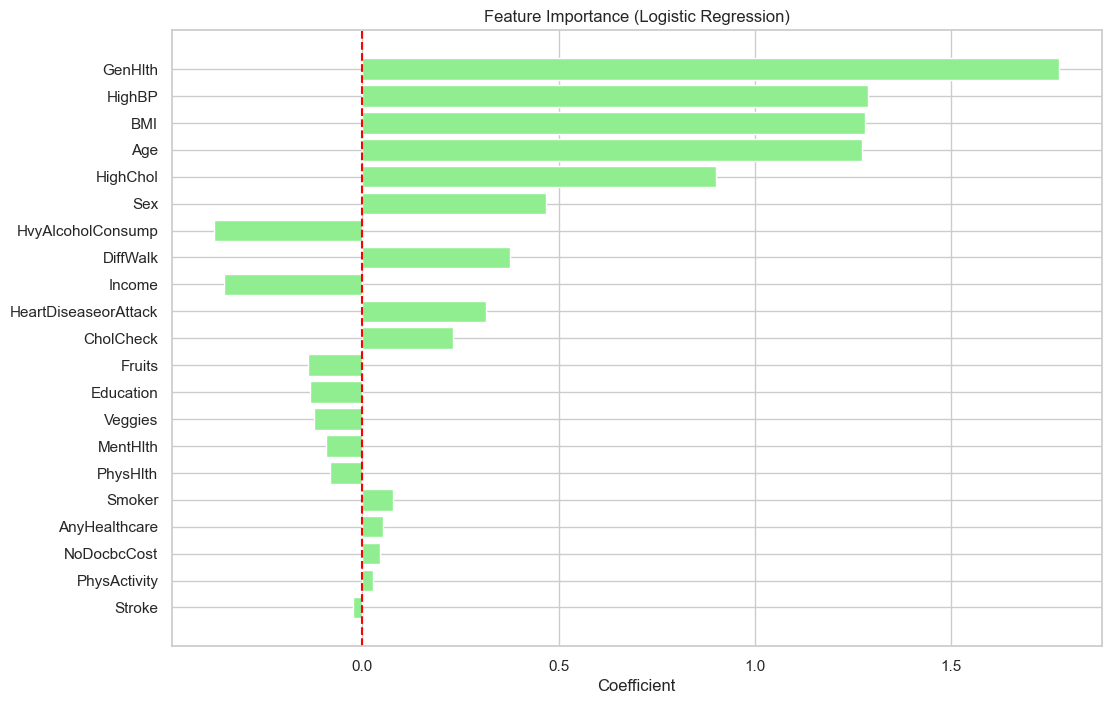

In [176]:
# Получение коэффициентов и имен признаков
coefficients = lg.coef_[0]  # Получаем коэффициенты для первого класса (положительный исход)
feature_names = xre_test.columns  # Имена признаков

# Создаем DataFrame для удобного отображения
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Сортируем по абсолютной величине коэффициентов
feature_importance_df['Absolute Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Построение графика
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'], color='lightgreen')
plt.xlabel('Coefficient')
plt.title('Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()  # Инвертируем ось Y, чтобы наиболее важные признаки были сверху
plt.axvline(0, color='red', linestyle='--')  # Добавляем вертикальную линию для нуля
plt.show()

***Сравнение алгоритмов***

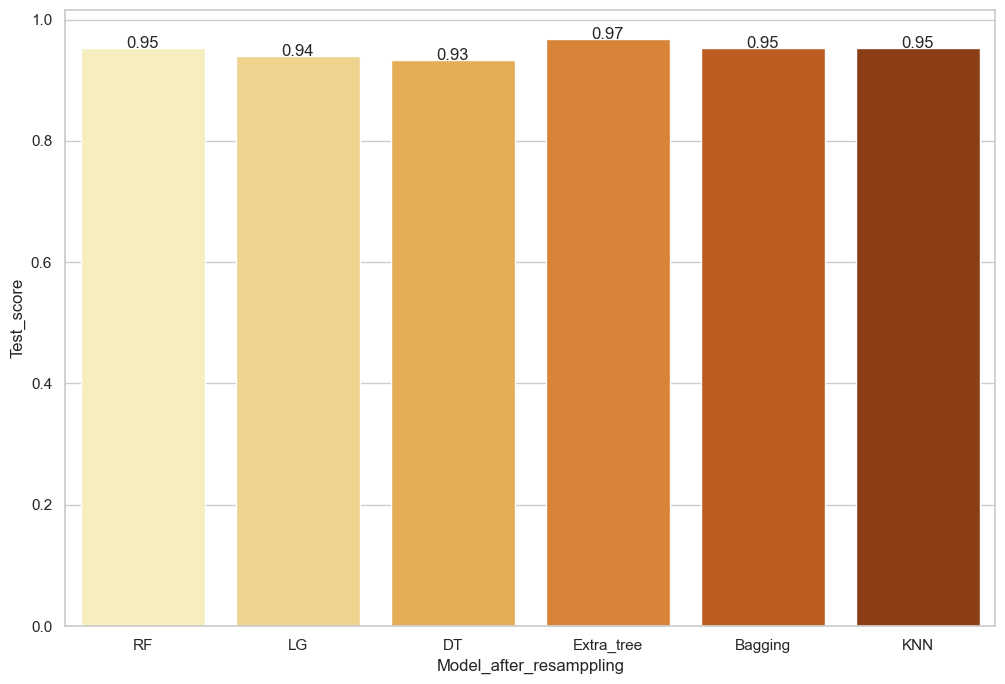

In [177]:
Performance = pd.DataFrame(
    data = {
        'Model_after_resamppling': ['RF','LG', 'DT','Extra_tree','Bagging','KNN'],
        'Test_score': [
                     accuracy_score(yre_test, y_pred_test_rf),
                     accuracy_score(yre_test, y_pred_test_lg),
                     accuracy_score(yre_test, y_pred_test_dt),
                     accuracy_score(yre_test, y_pred_test_etc),
                     accuracy_score(yre_test, y_pred_test_bagging_model),
                     accuracy_score(yre_test, y_pred_test_knn)],
        
        'ROC_AUC_Score': [
                         roc_auc_score_rf, 
                         roc_auc_score_lg, 
                         roc_auc_score_dt,
                         roc_auc_score_etc,
                         roc_auc_score_bagging_model,
                         roc_auc_score_knn ]
    }
)


def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Model_after_resamppling", y="Test_score", data= Performance, palette="YlOrBr")
show_values_on_bars(ax)


In [178]:
Performance.sort_values('ROC_AUC_Score',ascending=False)

,Model_after_resamppling,Test_score,ROC_AUC_Score
3,Extra_tree,0.967629,0.994978
0,RF,0.953755,0.989353
4,Bagging,0.952639,0.989353
1,LG,0.940041,0.984923
5,KNN,0.953596,0.984266
2,DT,0.933503,0.933517


In [179]:
print(xre_train.columns)

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [180]:
print(xre_test.columns)

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [181]:
print(df.columns)

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


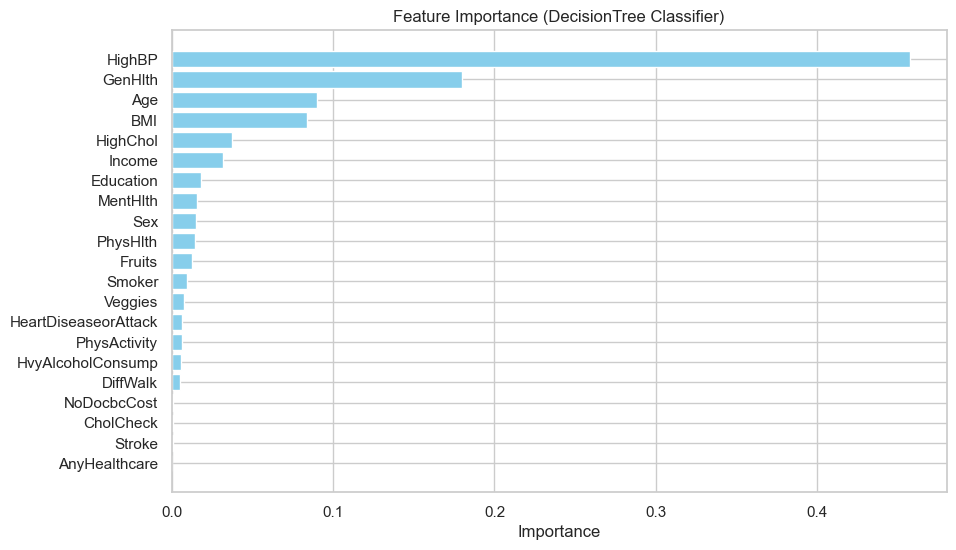

In [182]:
# Визуализация важностей признаков
importances = dt.feature_importances_
feature_names = xre_test.columns  # Или используйте список имен признаков

# Создаем DataFrame для удобного отображения
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Сортируем по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Построение графика
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (DecisionTree Classifier)')
plt.gca().invert_yaxis()  # Инвертируем ось Y, чтобы наиболее важные признаки были сверху
plt.show()

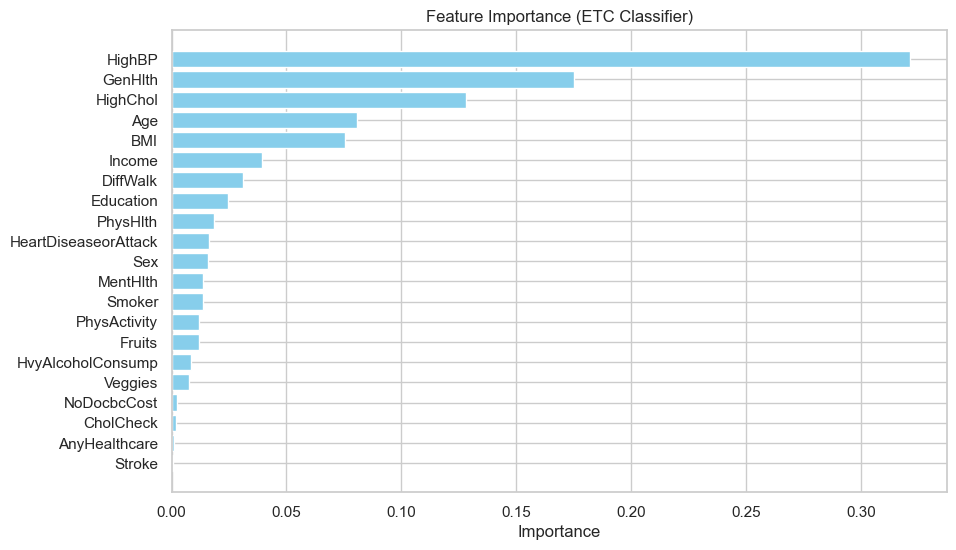

In [183]:
# Визуализация важностей признаков
importances = etc.feature_importances_
feature_names = xre_test.columns
# Создаем DataFrame для удобного отображения
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Сортируем по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Построение графика
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (ETC Classifier)')
plt.gca().invert_yaxis()  # Инвертируем ось Y, чтобы наиболее важные признаки были сверху
plt.show()

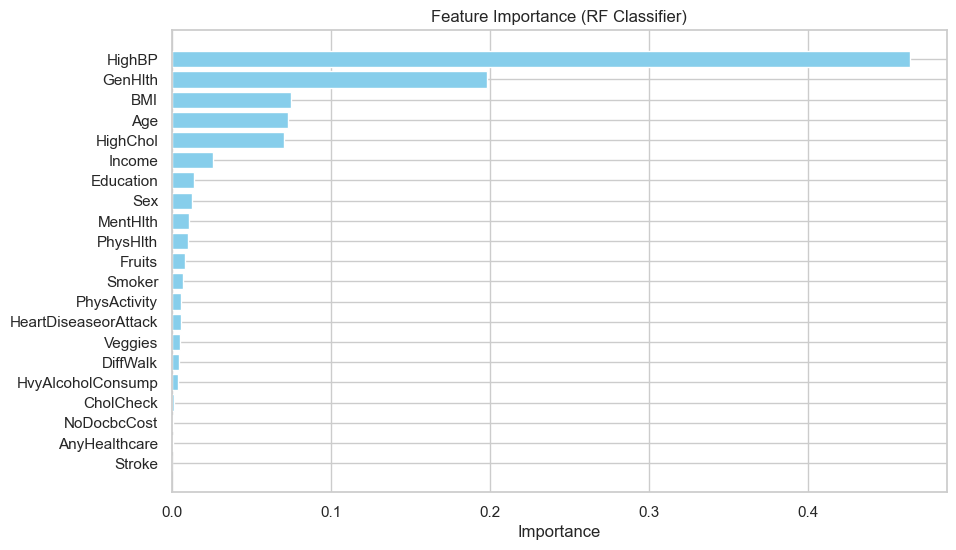

In [184]:
# Визуализация важностей признаков
importances = rf.feature_importances_
feature_names = x.columns  # Или используйте список имен признаков

# Создаем DataFrame для удобного отображения
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Сортируем по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Построение графика
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (RF Classifier)')
plt.gca().invert_yaxis()  # Инвертируем ось Y, чтобы наиболее важные признаки были сверху
plt.show()